# **SC1015 Mini Project (AY21/22 Semester 2)**

Done by:
**SC8 Team 04**
* Choo Jin Cheng (U2121190C)
* Chua Min Min (U2121126G)
* Poh Shi Qian (U2122452J)

Date of Submission: 24 April 2022


---
# **Real-life Problem:**

## Stroke can often be caused by unhealthy lifestyle and other health problems. Are there any **unconventional causes**?

According to the World Stroke Organisation (n.d.), stroke is a "leading cause of death and disability globally". In 2019 alone, there were 6.6 million people who died stroke of varying severity (American Heart Association, 2021). 

While age and chronic health conditions like heart diseases are commonly known to increase the chances of a person getting a stroke, there might be unconventional factors leading to a healthy person getting a stroke. **Hence, this project aims to uncover, if any, correlations between unconventional factors like marital status and a person's chance of getting a stroke.**

---
# **Data Science Question:**

## Do **unconventional features** help to better predict whether a person will have / already has a stroke?

This is a Classification problem. Our goal is to find out if there is any unconventional feature that makes one more likely to get a stroke.

---
# **Dataset:**

## Stroke Prediction Dataset from Kaggle
The dataset can be obtained from [this link](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download).

### Variables (Information extracted from Kaggle)
> **id**: unique identifier  
> **gender**: "Male", "Female" or "Other"  
> **age**: age of the patient  
> **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension  
> **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease  
> **ever_married**: "No" or "Yes"  
> **work_type**: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"  
> **Residence_type**: "Rural" or "Urban"  
> **avg_glucose_level**: average glucose level in blood  
> **bmi**: body mass index  
> **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*  
> **stroke**: 1 if the patient had a stroke or 0 if not  

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient 

**Unconventional features:**
* ever_married
* work_type
* Residence_type

The rest of the features in this dataset (except id) are known to affect a person's chance of getting a stroke.

---
# **Setting up for the project:**
In this section:<br>
1. Import the libraries for data loading
2. Load the CSV data into *stData*


In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
# 1. import general libraries
import pandas as pd

In [4]:
# 2. load data
stData = pd.read_csv('healthcare-dataset-stroke-data.csv')
stData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


---
# **Exploratory Data Analysis:**
In this section:<br>
1. Import libraries for EDA
2. Explore the dataset as a whole
3. Explore categorical attributes
4. Explore numerical attributes

In [5]:
# 1. import libraries for EDA
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

## Overall Exploration

In [6]:
# 2a. general info on the dataset
stData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Note: All numerical attributes are either int64 or float64

In [7]:
# 2b. check for NULL values
stData.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Note: 201 NULL values in bmi. Cleaning required.

In [8]:
# 2c. check for duplicates
stData.duplicated().sum()

0

Note: There are no duplicates in our dataset

In [9]:
# 2d. check for data that does not conform to data type of the column
for col in stData.columns:
    print('{} : {}'.format(col,stData[col].unique()))

id : [ 9046 51676 31112 ... 19723 37544 44679]
gender : ['Male' 'Female' 'Other']
age : [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02

Note: Everything looks okay except the NaN in bmi which we have identified earlier

## Categorical

### Individual Variables

In [10]:
# 3a. extracting the categorical attributes
catDF = pd.DataFrame(stData.drop(columns=["id", "age", "avg_glucose_level", "bmi"]))
catDF["hypertension"] = catDF["hypertension"].map({1:"Yes", 0:"No"})
catDF["heart_disease"] = catDF["heart_disease"].map({1:"Yes", 0:"No"})
catDF["stroke"] = catDF["stroke"].map({1:"Yes", 0:"No"})
catDF = catDF.astype("category")
catDF.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,Male,No,Yes,Yes,Private,Urban,formerly smoked,Yes
1,Female,No,No,Yes,Self-employed,Rural,never smoked,Yes
2,Male,No,Yes,Yes,Private,Rural,never smoked,Yes
3,Female,No,No,Yes,Private,Urban,smokes,Yes
4,Female,Yes,No,Yes,Self-employed,Rural,never smoked,Yes


In [11]:
# 3b. functions
def plotCount(attrb, df): # will be reused
  labels = df[attrb].unique()
  values = df[attrb].value_counts()
  for i in range(len(labels)):
    print("{:<15} ".format(labels[i]), end="")
  print()
  for i in range(len(values)):
    print("{:<15} ".format(values[i]), end="")
  print()

  g = sb.catplot(x=attrb, data=df, kind="count")

def plotCountHue(attrb, hue, df):
  lowest = 0
  for label in df[attrb].unique():
    total = df[df[attrb]==label][attrb].count()
    stroke = df[(df[attrb]==label) & (df["stroke"]=="Yes")][attrb].count()
    if (stroke < lowest and stroke != 0) or lowest==0:
      lowest = stroke
    print("{:<15} : {:<4} out of {:<4} -> {:.2f}% stroke".format(label, stroke, total , stroke/total*100))
  print()

  g = sb.catplot(x=attrb, data=df, kind="count", hue="stroke")
  g.refline(y=lowest, color="red", lw=1)

#### Stroke

Yes             No              
4861            249             


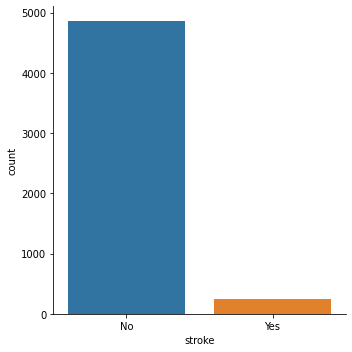

In [12]:
# 3c. exploring the variables
# stroke
plotCount("stroke", catDF)

Note: The distribution for our predictor variable 'stroke' is **imbalanced with the majority of patients NOT having stroke**. This imbalance can cause a **negative bias** in our models. This needs to be resolved.

#### Gender

Male            Female          Other           
2994            2115            1               


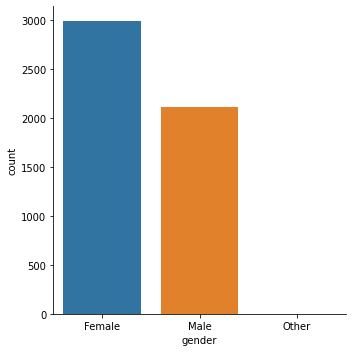

In [13]:
# gender
plotCount("gender", catDF)

Note: There is a rather good distribution between Males and Females, but **there is an additional ambiguous label 'Other'**. Cleaning required.

Male            : 108  out of 2115 -> 5.11% stroke
Female          : 141  out of 2994 -> 4.71% stroke
Other           : 0    out of 1    -> 0.00% stroke



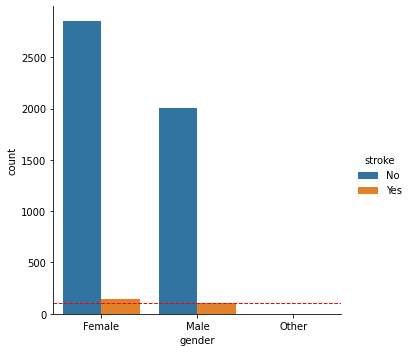

In [14]:
# gender vs stroke
plotCountHue("gender", "stroke", catDF)

Note: From the graph, there is a **higher number of female stroke patients** than male stroke patients in our dataset. However, if we look at the labels ('Female', 'Male') on their own, we notice that **males are more likely to get a stroke (5.11%)** as compared to females (4.71%). This is in line with the general trend that **males are more likely to get stroke than females** (Wyller, 1999).

'Other' label is ignored here because there is no such gender.

#### Hypertension

No              Yes             
4612            498             


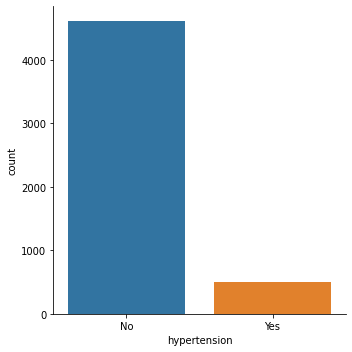

In [15]:
# hypertension
plotCount("hypertension", catDF)

Note: The distribution for this attribute 'hypertension' is imbalanced with the **majority of patients NOT having hypertension**.

No              : 183  out of 4612 -> 3.97% stroke
Yes             : 66   out of 498  -> 13.25% stroke



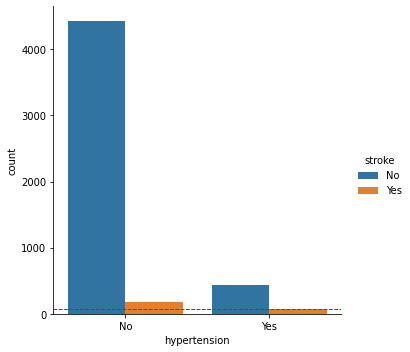

In [16]:
# hypertension vs stroke
plotCountHue("hypertension", "stroke", catDF)

Note: From the graph, amongst the stroke patients, there are **more without hypertension** than with hypertension. However, if we look at the labels ('Yes', 'No') individually, hypertension patients are **more likely to have had a stroke (13.25%)** than those without (3.97%). This aligns with the fact that hypertension is one of the main causes of stroke (WebMD, 2021).

#### Heart Disease

Yes             No              
4834            276             


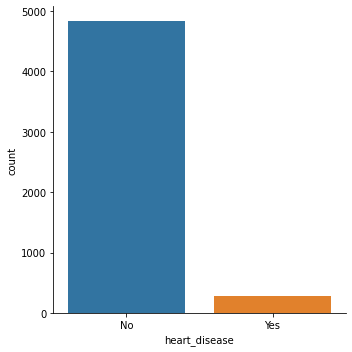

In [17]:
# heart_disease
plotCount("heart_disease", catDF)

Note: The distribution for this attribute 'heart_disease' is imbalanced with the **majority of patients NOT having heart diseases**.

Yes             : 47   out of 276  -> 17.03% stroke
No              : 202  out of 4834 -> 4.18% stroke



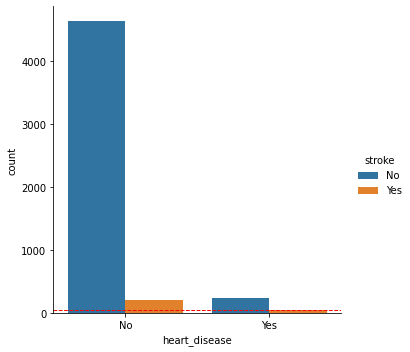

In [18]:
# heart_disease vs stroke
plotCountHue("heart_disease", "stroke", catDF)

Note: From the graph, amongst the stroke patients, there are **more without heart diseases** than with heart diseases. However, if we look at the labels ('Yes', 'No') individually, patients with heart diseases are **more likely to have had a stroke (17.03%)** than those without (4.18%). This aligns with the fact that heart diseases are one of the main causes of stroke (WebMD, 2021).

#### Marital History

Yes             No              
3353            1757            


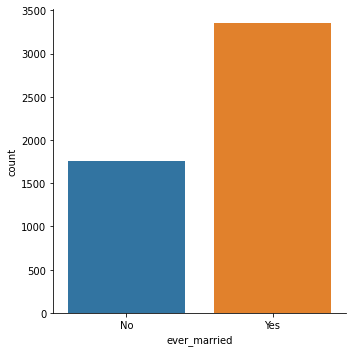

In [19]:
# ever_married
plotCount("ever_married", catDF)

Note: From the graph, we notice that there are **almost twice as many people who were ever married** as compared to people who were never married in our dataset.

Yes             : 220  out of 3353 -> 6.56% stroke
No              : 29   out of 1757 -> 1.65% stroke



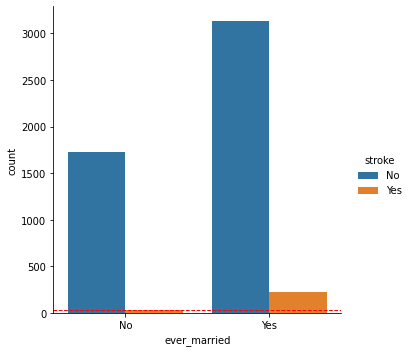

In [20]:
# ever_married vs stroke
plotCountHue("ever_married", "stroke", catDF)

Note: From the graph, amongst the stroke patients, there are **more who were ever married** than those who were never married. Judging by the individual labels, **people who were (once) married were also more likely to have had a stroke (6.56%)** than those who were never married (1.65%).
<br><br>
'ever_married' is one of the **unconventional features**. From the information we obtain from the graph, this feature is **likely to affect a person's chance of getting a stroke**.

#### Type of Work

Private         Self-employed   Govt_job        children        Never_worked    
2925            819             687             657             22              


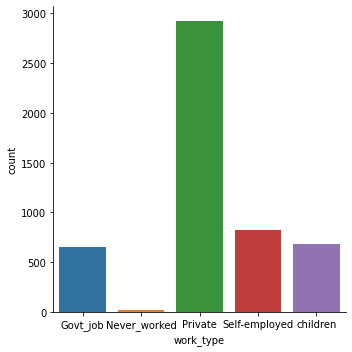

In [21]:
# work_type
plotCount("work_type", catDF)

Note: From the graph, we can see that we **do not have an even number of people for each type of work**. In addition, there are labels which are not a type of work by definition, for example, 'children'. 

Private         : 149  out of 2925 -> 5.09% stroke
Self-employed   : 65   out of 819  -> 7.94% stroke
Govt_job        : 33   out of 657  -> 5.02% stroke
children        : 2    out of 687  -> 0.29% stroke
Never_worked    : 0    out of 22   -> 0.00% stroke



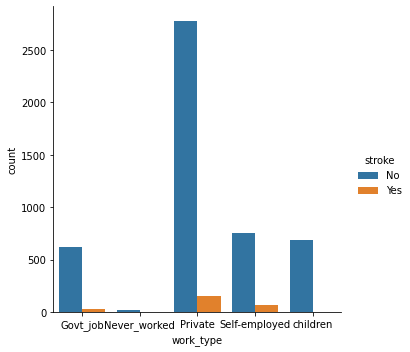

In [22]:
# work_type vs stroke
plotCountHue("work_type", "stroke", catDF)

Note: From the graph, we notice that **'Private' has the largest number of stroke patients (149)** as compared to the other labels. However, when we look at the labels individually, we see people whose work is labelled as **'Private' (5.09%) and 'Govt_job' (5.02%) are almost equally likely to get stroke**, whereas **'Self-employed' people are most likely to get stroke (7.94%)**. Generally, **people who have a job ('Govt_job', 'Private', 'Self-employed') are more likely to get or have a stroke** as compared to those who do not work ('children', 'Never_worked').
<br><br>
'work_type' is one of the **unconventional features**. From the information we obtain from the graph, this feature is **likely to affect a person's chance of getting stroke**.

#### Type of Residence

Urban           Rural           
2596            2514            


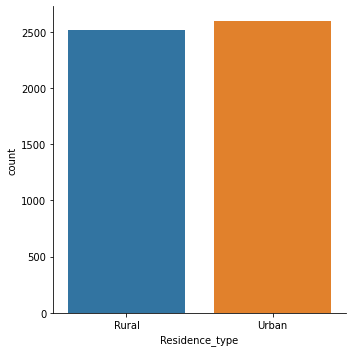

In [23]:
# Residence_type
plotCount("Residence_type", catDF)

Note: From the graph, we have an **even distribution** between the 'Rural' and 'Urban' residence types.

Urban           : 135  out of 2596 -> 5.20% stroke
Rural           : 114  out of 2514 -> 4.53% stroke



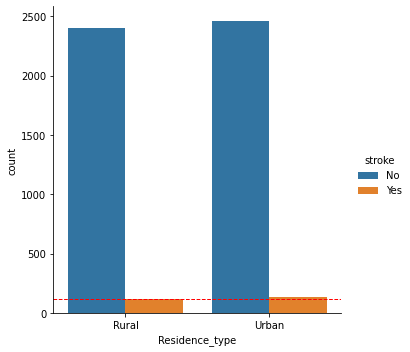

In [24]:
# ever_married vs stroke
plotCountHue("Residence_type", "stroke", catDF)

Note: From the graph, we notice that there is **slightly more people who live in 'Urban' areas who have had a stroke (135) than people who live in 'Rural' areas (114)**. Looking at the labels individually, **people who live in the 'Urban' areas are also slightly more likely to have had a stroke (5.20%) than people who live in the 'Rural' areas (4.53%)**. 
<br><br>
'Residence_type' is one of the **unconventional features**. From the information we obtain from the graph, this feature is **unlikely to affect a person's chance of getting stroke**. There is only a **small difference** in likelihoods of getting a stroke between people who lives in 'Urban' and 'Rural' areas.

#### Smoking Status

formerly smoked never smoked    smokes          Unknown         
1892            1544            885             789             


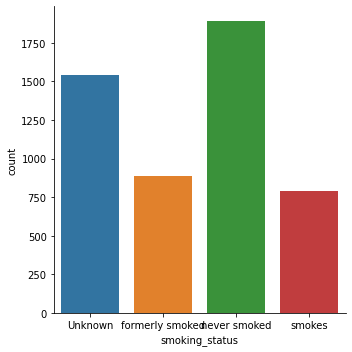

In [25]:
# smoking_status
plotCount("smoking_status", catDF)

Note: From the graph, there is **no even distribution** across the four categories for smoking statuses. We note that there are more people who has never smoked or their smoking status is unknown.
<br><br>
Having 'Unknown' smoking status can lead to **misleading conclusions** like "people with 'Unknown' smoking status are more/less likely to get a stroke". Cleaning required.

formerly smoked : 70   out of 885  -> 7.91% stroke
never smoked    : 90   out of 1892 -> 4.76% stroke
smokes          : 42   out of 789  -> 5.32% stroke
Unknown         : 47   out of 1544 -> 3.04% stroke



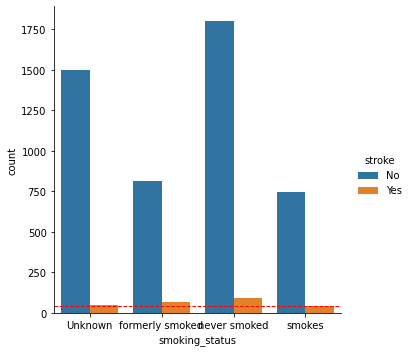

In [26]:
# smoking_status vs stroke
plotCountHue("smoking_status", "stroke", catDF)

Note: From the graph, the **'never smoked' label has the highest number of stroke patients (90)**. However, if we look at the labels individually, people who **'formerly smoked' are the most likely to have had a stroke (7.91%)**, followed by people who are **still smoking ('smokes' label) when the data was collected (5.32%)**. This aligns with the fact that smoking is one of the main causes of stroke (WebMD, 2021).

### Correlation Check

#### Chi-square Test
The Chi-square test is used to find the correlation between categorical features and the predictor.
<br><br>
<img src="chi-sq.jpg">
<br><br>
The larger chi-square is, the greater the difference between the observed frequencies and the expected frequencies.
<br><br>
To understand the formula for the Chi-square test better, please visit [this link](https://www.mathsisfun.com/data/chi-square-test.html).
<br><br>
From the chi-square value, we are able to derive a p-value.
<br><br>
If this p-value for a feature is greater than 0.05, it means that the feature is not correlated with the predictor.

In [27]:
def chi_sq_corr(df):
  for col in df.columns[:-1]:
    crosstab = pd.crosstab(index=df[col], columns=df["stroke"])
    chisq = chi2_contingency(crosstab) # 1 = no correlation
    print("{:<30}: {:.5f} -> ".format(col, chisq[1]), end="")
    if (chisq[1] > 0.05):
      print("NOT correlated\r")
    else:
      print("correlated\r")
    
print("{:<30}  {}".format("Feature", "p-value > 0.05?"))
print()
chi_sq_corr(catDF)

Feature                         p-value > 0.05?

gender                        : 0.78955 -> NOT correlated
hypertension                  : 0.00000 -> correlated
heart_disease                 : 0.00000 -> correlated
ever_married                  : 0.00000 -> correlated
work_type                     : 0.00000 -> correlated
Residence_type                : 0.29833 -> NOT correlated
smoking_status                : 0.00000 -> correlated


Note: The correlations between each of the categorical variables and stroke are **in line with our insights from above exploration**, except for **"gender", which apparently is not correlated with stroke with a high p-value**, even higher than that of 'Residence_type'.

## Numerical

In [28]:
# 4a. extracting the categorical attributes
numDF = pd.DataFrame(stData[["age","bmi","avg_glucose_level","stroke"]])
numDF["stroke"] = numDF["stroke"].map({1:"Yes", 0:"No"})
numDF.head()

,age,bmi,avg_glucose_level,stroke
0,67.0,36.6,228.69,Yes
1,61.0,NaN,202.21,Yes
2,80.0,32.5,105.92,Yes
3,49.0,34.4,171.23,Yes
4,79.0,24.0,174.12,Yes


In [29]:
# 4b. functions
def plotBox(attrb, df, ax=None):
  g = sb.boxplot(x=attrb, data=df, orient='h', ax=ax)

def plotHist(attrb, df, ax=None):
  g = sb.histplot(x=attrb, data=df, kde=True, bins=40, ax=ax)

def plotViolin(attrb, df, ax=None):
  g = sb.violinplot(x=attrb, data=df, ax=ax)

def plotCombine(attrb, df):
  print("Statistics:\n")
  print(df[attrb].describe().to_string())
  print("Skew: {}".format(df[attrb].skew()))
  print()
  fig, ax = plt.subplots(3,1,figsize=(10,10))
  plotHist(attrb, df, ax[0])
  plotViolin(attrb, df, ax[1])
  plotBox(attrb, df, ax[2])
  plt.show()

def plotBoxY(attrb, hue, df, ax):
  g = sb.boxplot(x=attrb, y=hue, data=df, orient='h', ax=ax, order=["No", "Yes"])

def plotHistY(attrb, hue, df, ax):
  g = sb.histplot(x=attrb, hue=hue, data=df, kde=True, bins=40, ax=ax, hue_order=["No", "Yes"])

def plotViolinY(attrb, hue, df, ax):
  g = sb.violinplot(x=attrb, y=hue, data=df, orient='h', ax=ax, order=["No", "Yes"])

def plotCombineHue(attrb, hue, df):
  fig, ax = plt.subplots(3,1,figsize=(10,20))
  plotHistY(attrb, hue, df, ax[0])
  plotViolinY(attrb, hue, df, ax[1])
  plotBoxY(attrb, hue, df, ax[2])
  plt.show()

### Individual Variables

#### Age

Statistics:

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Skew: -0.1370593225984694



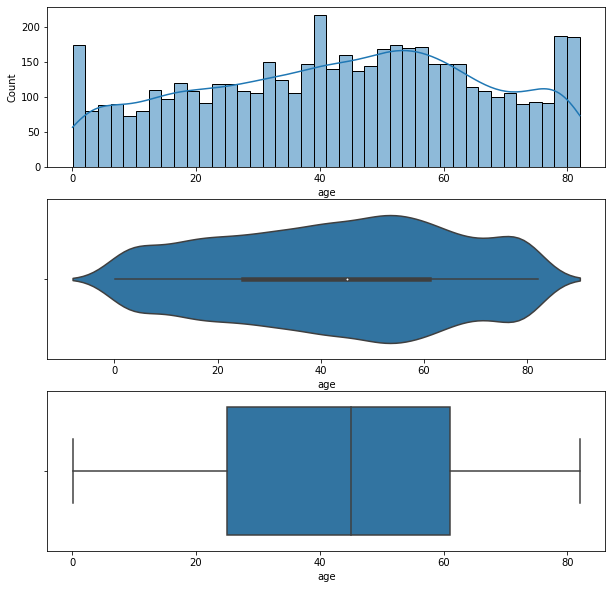

In [30]:
# 4c. exploring the variables
# age
plotCombine("age", numDF)

Note: There is **no outlier** for 'age'. We note that people in the dataset can be as young as a month old, and as old as 82 years old.
<br><br>
**'Age' does not follow the normal distribution** in our dataset. It has a **negative skew value** (meaning skewed to the right side). This means that we have more data from the older population.

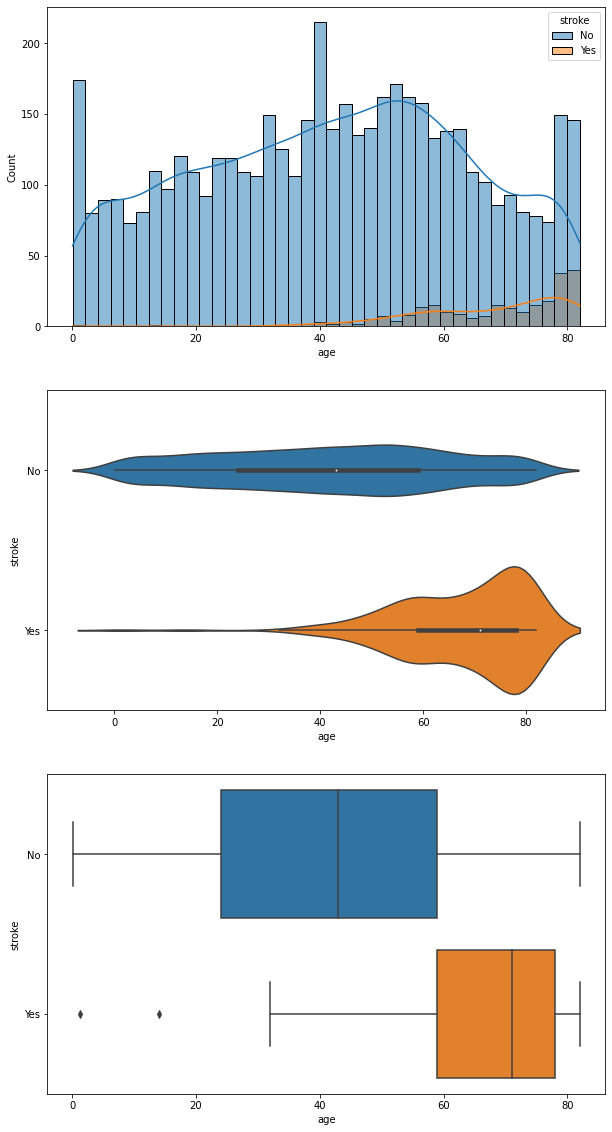

In [31]:
plotCombineHue("age", "stroke", numDF)

Note: There are **two outliers** for stroke patients below 20 years old. The range of age for stroke patients **begins at an older age** as compared to non-stroke patients.
<br><br>
From the box plot, the IQR for stroke patients almost begins at the age where the IQR for non-stroke patients ends. This means that **most of the stroke patients are older than non-stroke patients**.
<br><br>
Looking at the histogram and violin plot, we notice an **exponential increase** in the number of stroke patients **as the age reaches 80**.
<br><br>
The above observations highlight the pattern that **older age increases the chances of a person getting a stroke**. This is in line with the general trend that old age is one of the greater factors contributing to stroke (WebMD, 2021).

#### Average Glucose Level

Statistics:

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Skew: 1.5722838665030459



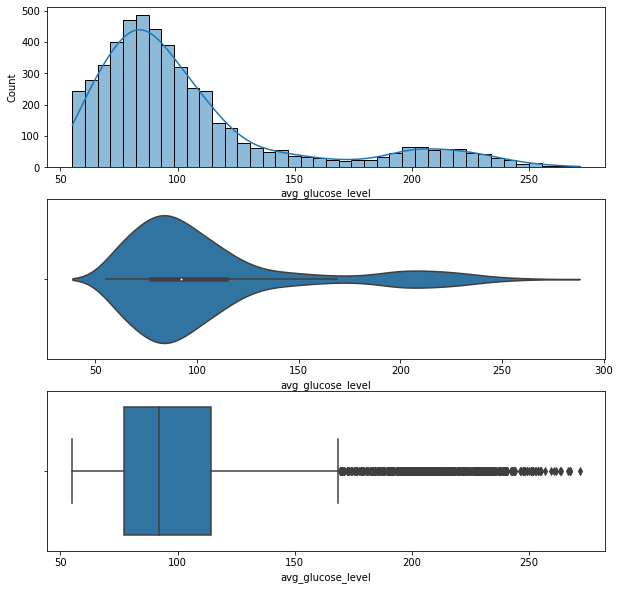

In [32]:
# avg_glucose_level
plotCombine("avg_glucose_level", numDF)

Note: There are **quite a number of outliers** for 'avg_glucose_level'. We note that the average glucose levels generally lies between **55 to 165 (approx.)**, with the outliers being **extremely high values** up to 271.
<br><br>
**'avg_glucose_level' does not follow the normal distribution.** It has a **positive skew value** (meaning skewed to the lefft side). This means that we have more data from lower average glucose levels.

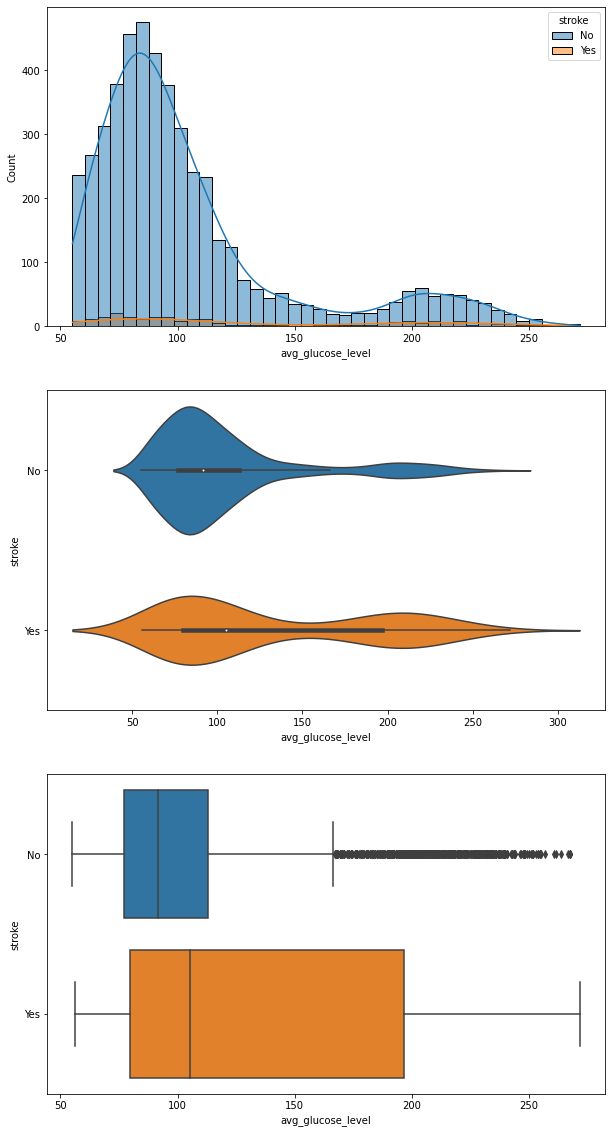

In [33]:
plotCombineHue("avg_glucose_level", "stroke", numDF)

Note: The range of average glucose level for non-stroke patients **is much smaller** than stroke patients, and the range for non-stroke patients lies closer to the left side, suggesting that non-stroke patients generally have **lower average glucose levels**.
<br><br>
Looking at the box plot, we notice that the **outliers noted previously are non-stroke patients**. This shows that it is **out of the general pattern for people with high average glucose levels to not have stroke**.
<br><br>
Looking at the violin plot and histogram, we notice two peaks, one at **approximately 90** and the other at **approximately 210**. This shows how it **may not be uncommon for people with low (or if not healthy) average glucose levels to have stroke as well**.
<br><br>
Although based on the **median, Q3 and maximum values** for stroke and non-stroke patients, we are able to deduce that there is **likely correlation between the average glucose level and stroke** (which is in line with general medical trends (WebMD, 2021)), it is interesting to note that **(i) it is not uncommon for people with healthy average blood glucose levels to have stroke** and **(ii) there are more than a handful that have high average blood glucose levels but do not have stroke**.

#### BMI

Statistics:

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Skew: 1.0553402052962912



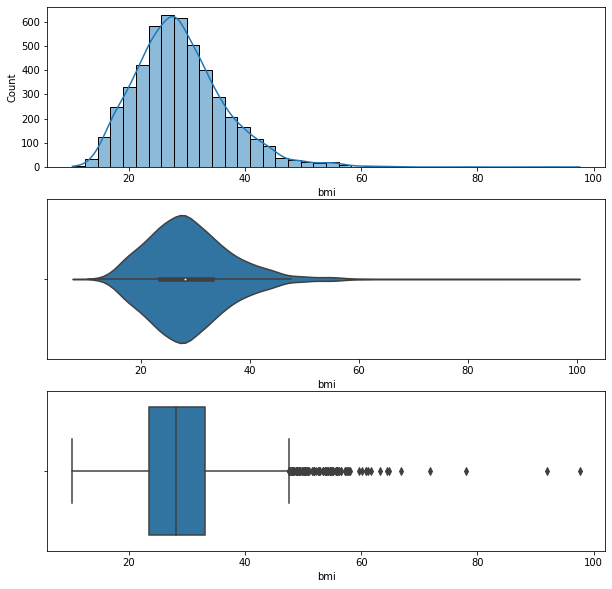

In [34]:
# bmi
plotCombine("bmi", numDF)

Note: There are **quite a number of outliers** for 'bmi'. We note that the bmi numbers in our dataset generally lies between **7 to 47 (approx.)**, with the outliers being **extremely high values up to 97**.
<br><br>
**'bmi' does not follow the normal distribution.** It has a **positive skew value** (meaning skewed to the left side). This means that we have more data from the lower bmi individuals.

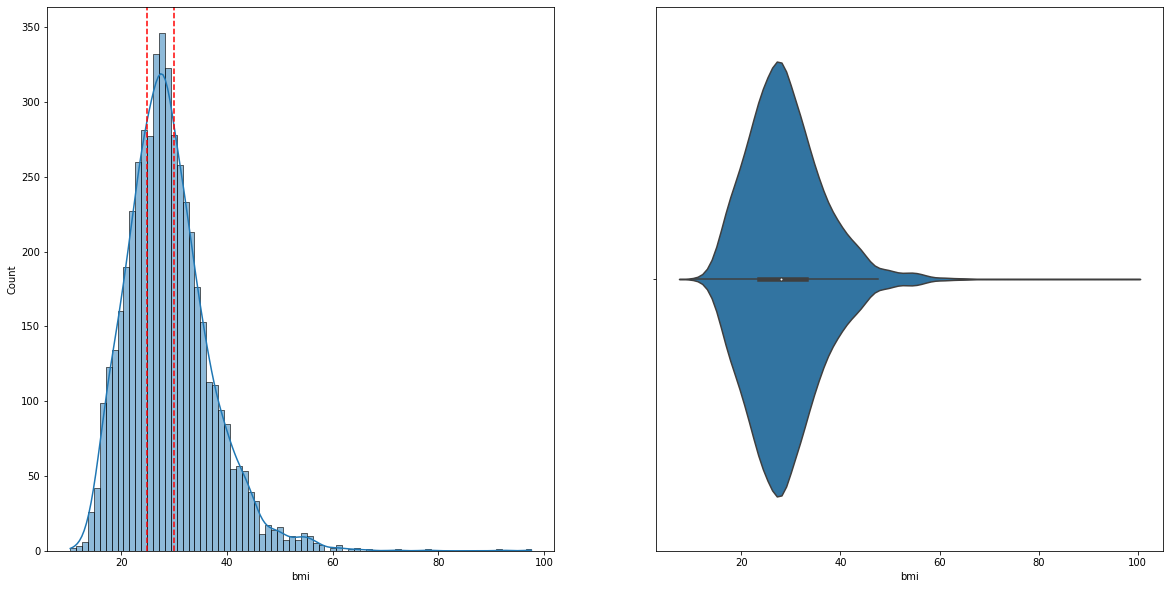

In [35]:
# additional plot for bmi
fig, ax =plt.subplots(1,2, figsize=(20,10))
sb.histplot(data = numDF["bmi"], kde = True, ax=ax[0])
ax[0].axvline(24.9,color="red", ls="--")
ax[0].axvline(29.9,color="red", ls="--")
g = sb.violinplot(data = numDF, x= "bmi", ax=ax[1])

As seen from the histogram and violin plot, we observe that a large population of our dataset falls into the category of **Pre-Obesity BMI (25.0-29.9, marked by red lines)** *according to WHO standard.

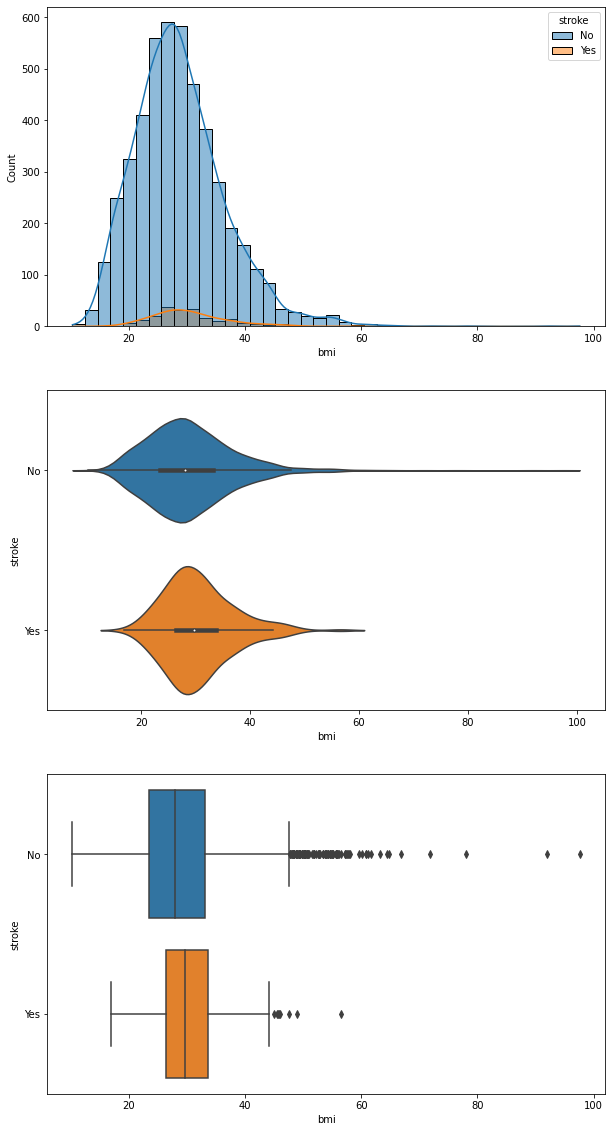

In [36]:
plotCombineHue("bmi", "stroke", numDF)

Note: Looking at the graphs for stroke patients (orange), we are able to identify that **stroke patients generally have a BMI of approximately 30**, which is considered 'Obese'. 
<br><br>
However, the **range of BMI for non-stroke patients is wider than that of the stroke patients**. Additionally, most of the **outliers identified previously are non-stroke patients**, meaning that there are many people in the dataset with **high BMIs but do not have stroke**. 
<br><br>
Our observations from the above graphs suggest that even if there is a correlation between BMI and stroke**, it **will not be a strong one**, especially with the number of non-stroke patients having a high BMI. 

### Correlation Check

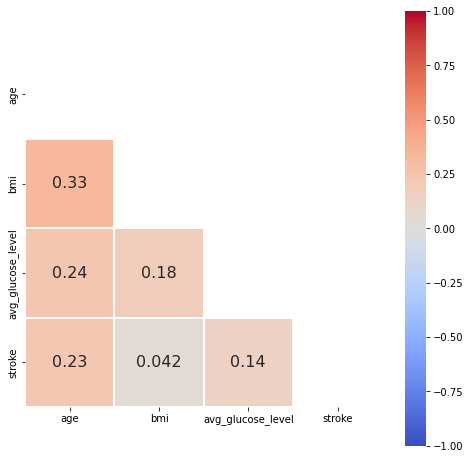

In [37]:
def num_corr(df):
  corr_matrix = df.corr().round(3)
  mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # mask - remove redundant upper triangle
  fig, ax = plt.subplots(figsize=(8,8))
  g = sb.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', linewidth=1, mask=mask, square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)
  plt.show()

numDF["stroke"] = numDF["stroke"].map({"Yes":1, "No":0})
nulls = numDF["bmi"].isna()
indices = nulls.index[nulls==True]
noNullNumDF = numDF.drop(axis=0, index=indices)
num_corr(noNullNumDF)

Note: The correlations between each of the numerical variable and stroke are **in line with our insights from above exploration**, where 'age' and 'avg_glucose_level' have a greater correlation with stroke than 'bmi'.

---
# **Data Preparation & Cleaning:**
In this section:<br>
1. Create *cleanData* for use in ML later
2. Reasons for not removing numerical outliers
3. Clean the data in *stData*
>**id**: drop this column<br>
>**gender**: eliminate label 'Other'<br>
>**bmi**: eliminate NaN values<br>
>**smoking_status**: eliminate label 'Unknown'
4. Perform one-hot encoding / mapping for the categorical data columns
>**One-Hot:** work_type, smoking_status<br>
>**Mapping:** gender, ever_married, Residence_type<br>
>Not needed: hypertension, heart_disease
5. Check for multicollinearity
6. Post-cleaning
>Repeat correlation checks
>Feature selection to identify important features with respect to 'stroke' using SelectKBest


In [38]:
# 1a. create cleanData
cleanData = stData.copy()
cleanData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [39]:
# 1b. functions
def print_valcount(b,v,df):
  if b:
    print("Before\n-----")
  else:
    print("\nAfter\n-----")
  print(df[v].value_counts().to_string())

# def print_des(b,v,df): # commented out because we are not removing outliers
#   if b:
#     print("Before\n-----")
#   else:
#     print("\nAfter\n-----")
#   print(df[v].describe().to_string())
#   print("skew: {}".format(df[v].skew()))

def print_nan(b,v,df):
  if b:
    print("Before\n-----")
  else:
    print("\nAfter\n-----")
  print("NaN count: ", df[v].isna().sum())

## Why are numerical outliers not removed?

In [40]:
# 2. count numerical outliers
def numOutliers(v, df):
  # print_des(1,v,df)
  check = df[v]
  Q1 = check.quantile(0.25)
  Q3 = check.quantile(0.75)
  IQR = Q3 - Q1
  outliers = (check < (Q1-1.5*IQR)) | (check > (Q3+1.5*IQR))
  indices = outliers.index[outliers==True]
  # cleanData.drop(axis=0, index=indices, inplace=True) # for removal
  # print("\nROWS DROPPED SUCCESSFULLY!") # for removal
  # print_des(0,v,df) # for removal
  print("{:<18}: {}".format(v,len(indices)))

numOutliers("avg_glucose_level", cleanData)
numOutliers("bmi", cleanData)


avg_glucose_level : 627
bmi               : 110


The reasons for **not** removing numerical outliers:
* Numerical variables like 'avg_glucose_level' and 'bmi' are **not the variables we are focusing on** (we are focusing on 'ever_married', 'work_type' and 'Residence_type')<br><br>
* It is easy to determine outliers for numerical variables, but not for categorical. Hence, it is **unclear what is the set of outliers across all variables**.<br><br>
* If we remove all numerical outliers, it will be a loss of at least 627 rows, which is **more than 10% reduction in the size of our dataset**.<br><br>
* Even if we only remove outliers that are common across numerical variables, we might **accidentally remove data that are important for other variables**. The last thing we want is to remove important data from the 3 variables we are focusing on!

## Actual work

#### ID

In [41]:
# 3a. drop "id"
cleanData.drop("id", inplace=True, axis=1) # drop column
print("\nCOLUMN DROPPED SUCCESSFULLY!")


COLUMN DROPPED SUCCESSFULLY!


In [42]:
cleanData.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Reason for above:**<br>
The column "id" is dropped because it is **irrelevant** to whether a person has stroke or not. It is just a unique identifier for each patient.

#### Gender

In [43]:
# 3b. eliminate 'Other' in "gender"
print_valcount(1,"gender",cleanData)

cleanData.drop(cleanData.index[(cleanData["gender"] == "Other")],axis=0,inplace=True) # drop row
print("\nROW DROPPED SUCCESSFULLY!")

print_valcount(0,"gender",cleanData)

Before
-----
Female    2994
Male      2115
Other        1

ROW DROPPED SUCCESSFULLY!

After
-----
Female    2994
Male      2115


**Reason for above:**<br>
There is only one (1) patient with 'Other' as the value for "gender". As it is ambiguous as to whether the person is a male or female, and since it affects only a single row of data, **the row is dropped out of convenience**.

#### BMI

In [44]:
# 3c. eliminate NaN values in "bmi"
print_nan(1,"bmi",cleanData)

cleanData["bmi"].fillna(cleanData["bmi"].mean(), inplace = True) # replace Nan with mean
print("\nNaN REPLACED SUCCESSFULLY!")

print_nan(0,"bmi",cleanData)

Before
-----
NaN count:  201

NaN REPLACED SUCCESSFULLY!

After
-----
NaN count:  0


**Reason for above:**<br>
There are 201 NaN values in "bmi" column. They are **replaced with the mean value**.

#### Smoking Status

In [45]:
# 3d. eliminate 'Unknown' in "smoking_status"
print_valcount(1,"smoking_status",cleanData)

print("\nBreakdown based on smoking_status:") # print breakdown
for status in cleanData["smoking_status"].unique():
  print("\t{}:".format(status))
  stroke = cleanData[(cleanData["smoking_status"]==status) & (cleanData["stroke"]==1)]["smoking_status"].count()
  noStroke = cleanData[(cleanData["smoking_status"]==status) & (cleanData["stroke"]==0)]["smoking_status"].count()
  print("\t\tStroke:\t\t{}, {:.2f}%".format(stroke, stroke/(stroke+noStroke)*100))
  print("\t\tNo Stroke:\t{}, {:.2f}%".format(noStroke, noStroke/(stroke+noStroke)*100))

cleanData.loc[(cleanData.smoking_status == "Unknown") & (cleanData.stroke == 1), "smoking_status"] = "formerly smoked"
cleanData.loc[(cleanData.smoking_status == "Unknown") & (cleanData.stroke == 0), "smoking_status"] = "never smoked"
print("\nLABELS CHANGED SUCCESSFULLY!")

print_valcount(0,"smoking_status",cleanData)


Before
-----
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789

Breakdown based on smoking_status:
	formerly smoked:
		Stroke:		70, 7.92%
		No Stroke:	814, 92.08%
	never smoked:
		Stroke:		90, 4.76%
		No Stroke:	1802, 95.24%
	smokes:
		Stroke:		42, 5.32%
		No Stroke:	747, 94.68%
	Unknown:
		Stroke:		47, 3.04%
		No Stroke:	1497, 96.96%

LABELS CHANGED SUCCESSFULLY!

After
-----
never smoked       3389
formerly smoked     931
smokes              789


**Reason for above:**<br>
It does not make sense for one to say "a person with 'Unknown' smoking status is more/less likely to get a stroke". Hence, **this label needs to be removed**.<br><br>
Looking at the distribution of patients before cleaning, patients with 'formerly smoked' smoking status has the highest percentage of 7.92% of getting a stroke, whereas patients with 'never smoked' has the lowest percentage of 4.76% of getting a stroke. Therefore, for patients whose smoking statuses are 'Unknown', **if they have had a stroke, the label will be changed to 'formerly smoked'** and if they **have not had a stroke, the label will be changed to 'never smoked'**.

#### One-Hot Encoding / Mapping

In [46]:
# 4. one-hot encoding / mapping for categorical columns
# cleanData = pd.get_dummies(cleanData, columns=["work_type", "smoking_status", "gender", "ever_married", "Residence_type"]) # one-hot for all, results in some perfect collinear relationships
cleanData = pd.get_dummies(cleanData, columns=["work_type", "smoking_status"])

cleanData["gender"] = cleanData["gender"].map({"Female":0, "Male":1})
cleanData["ever_married"] = cleanData["ever_married"].map({"Yes":1, "No":0})
cleanData["Residence_type"] = cleanData["Residence_type"].map({"Urban":1, "Rural":0})

cleanData.rename(columns={"Residence_type":"reside_urban", "gender":"is_Male"}, inplace=True) # so header becomes more intuitive

stroke = cleanData.pop("stroke") # put stroke at the back (last column)
cleanData["stroke"] = stroke

cleanData.head()

,is_Male,age,hypertension,heart_disease,ever_married,reside_urban,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1,67.0,0,1,1,1,228.69,36.60000,0,0,1,0,0,1,0,0,1
1,0,61.0,0,0,1,0,202.21,28.89456,0,0,0,1,0,0,1,0,1
2,1,80.0,0,1,1,0,105.92,32.50000,0,0,1,0,0,0,1,0,1
3,0,49.0,0,0,1,1,171.23,34.40000,0,0,1,0,0,0,0,1,1
4,0,79.0,1,0,1,0,174.12,24.00000,0,0,0,1,0,0,1,0,1


Note: 'work_type' and 'smoking_status' are **one-hot encoded**. 'gender', 'ever_married' and 'Residence_type' are **label encoded**.
<br><br>
'Residence_type' has been renamed to 'reside_urban', and 'gender' has been renamed to 'is_Male'. The new names are more intuitive.

### Multicollinearity check

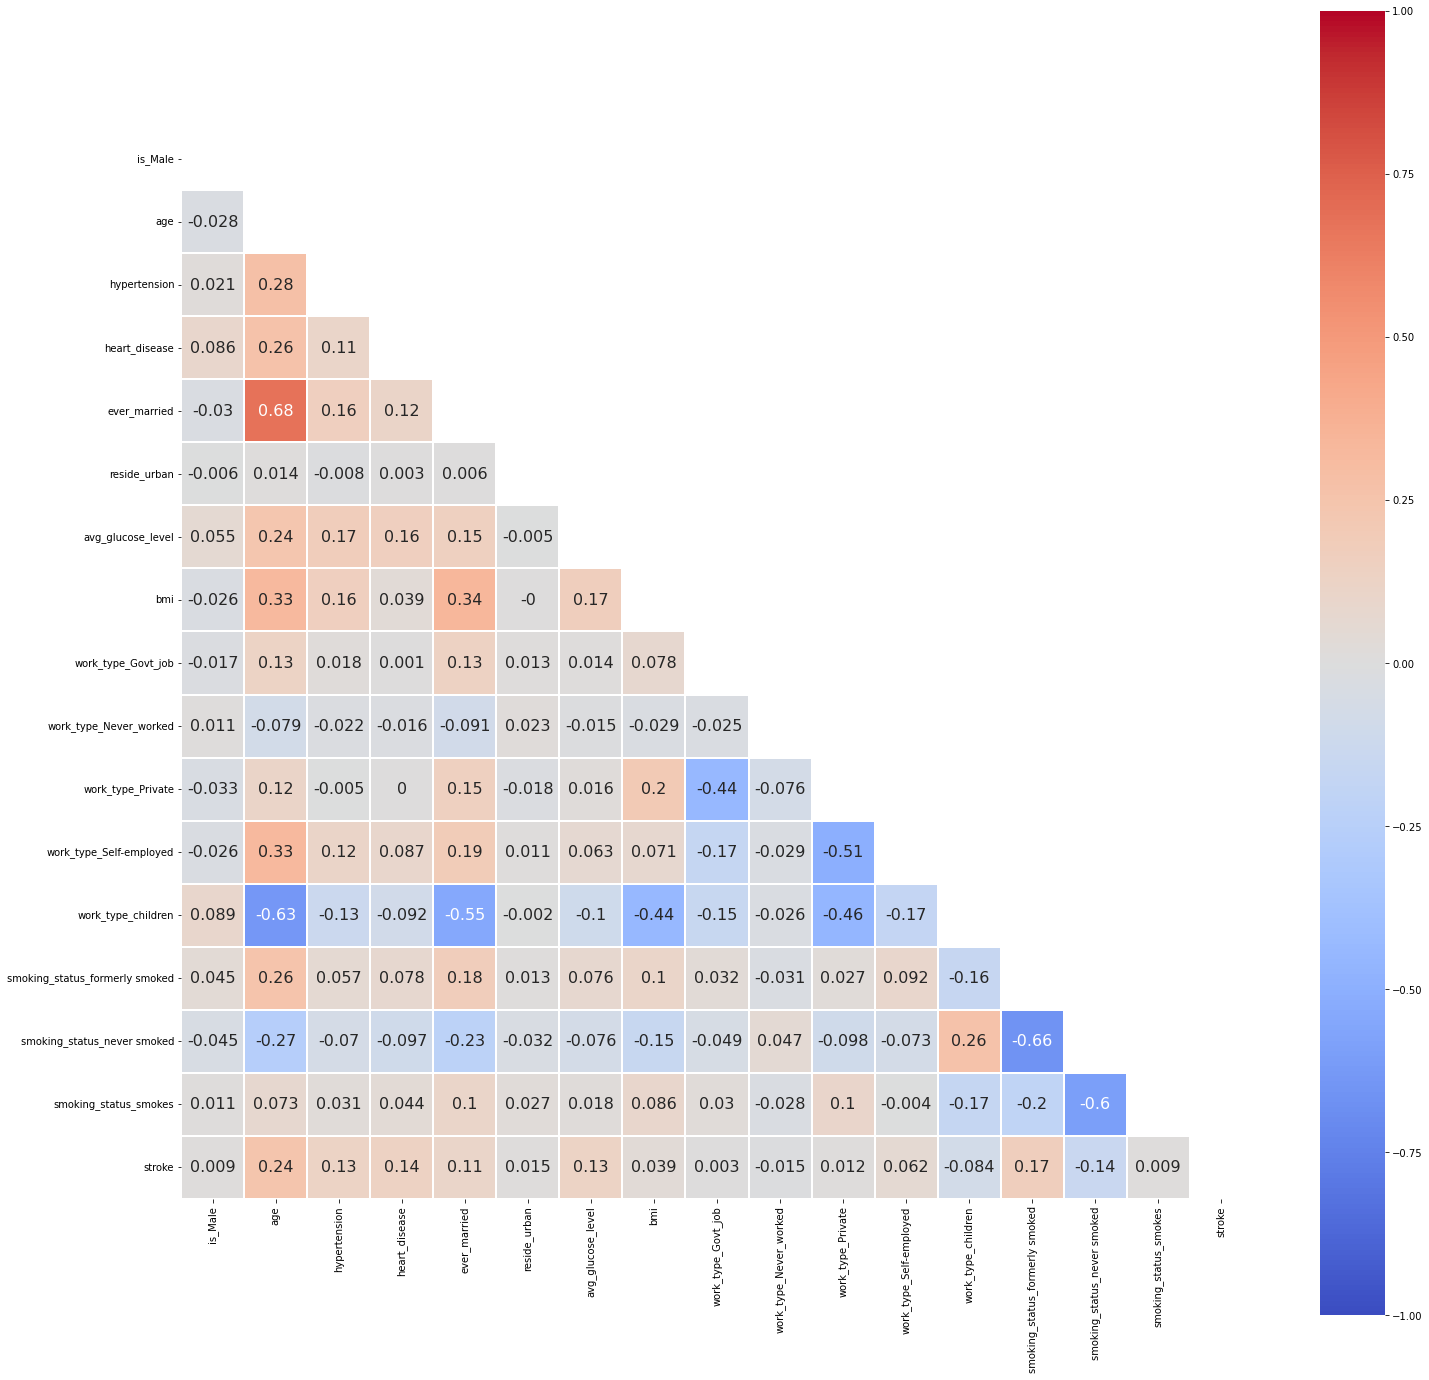

In [47]:
# 5. check if any multicollinearity
corr_matrix = cleanData.corr().round(3)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # mask - remove redundant upper triangle

fig, ax = plt.subplots(figsize=(24,24))
g = sb.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', linewidth=1, mask=mask, square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)
plt.show()

Note: No multicollinearity observed.

Note: From the heatmap, we observe the following:<br>
* Positive Correlation

  **ever_married vs age : 0.68**<br>
  It is expected that they have a greater positive correlation as compared to other factors since older people are more likely to be married, or have been married before.
* Negative Correlation

  **work_type_children vs age: -0.63**<br>
  The younger group in the dataset are likely to be given the work_type 'children'. The correlation is expected.<br><br>
  **smoking_status_never smoked vs smoking_status_formerly smoked: -0.66**<br>
  The correlation is expected since they are contradictory labels.<br><br>
  **smoking_status_smokes vs smoking_status_never smoked: -0.6**<br>
  The correlation is expected since they are contradictory labels.

With regards to the unconventional features:
* **ever_married vs stroke: 0.11**<br><br>
* **reside_urban vs stroke: 0.015**<br><br>
* work_type_Govt_job vs stroke: 0.003
* work_type_Never worked vs stroke: -0.015
* work_type_Private vs stroke: 0.012
* **work_type_Self-employed vs stroke: 0.062**
* **work_type_children vs stroke: -0.084**


<br>For the unconventional features, **'ever_married' has the strongest correlation with 'stroke'**, followed by 'work_type_children' and 'work_type_Self-employed'.

## Post-Cleaning

### Correlation Checks

In [48]:
# 6a. correlation [categorical]
cleanCat = pd.DataFrame(cleanData[["is_Male", "hypertension", "heart_disease", "ever_married", "reside_urban",
                                   "work_type_Govt_job", "work_type_Private", "work_type_Never_worked", "work_type_Self-employed", "work_type_children",
                                   "smoking_status_formerly smoked", "smoking_status_never smoked", "smoking_status_smokes", "stroke"]])
chi_sq_corr(cleanCat)

is_Male                       : 0.55983 -> NOT correlated
hypertension                  : 0.00000 -> correlated
heart_disease                 : 0.00000 -> correlated
ever_married                  : 0.00000 -> correlated
reside_urban                  : 0.29983 -> NOT correlated
work_type_Govt_job            : 0.92586 -> NOT correlated
work_type_Private             : 0.43135 -> NOT correlated
work_type_Never_worked        : 0.57016 -> NOT correlated
work_type_Self-employed       : 0.00001 -> correlated
work_type_children            : 0.00000 -> correlated
smoking_status_formerly smoked: 0.00000 -> correlated
smoking_status_never smoked   : 0.00000 -> correlated
smoking_status_smokes         : 0.58389 -> NOT correlated


Note:
* 'work_type_Govt_job', 'work_type_Private' and 'work_type_Never_worked' are NOT correlated with 'stroke'
* **'work_type_Self-employed' and 'work_type_children' are correlated with 'stroke'**
* 'smoking_status_formerly smoked' and 'smoking_status_never smoked' are correlated with 'stroke'
* 'smoking_status_smokes' is NOT correlated with 'stroke'
* There are no changes in the remaining variables' correlation with 'stroke'

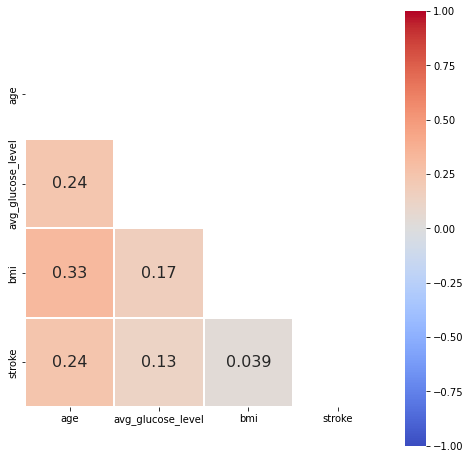

In [49]:
# 6b. correlation [numerical]
cleanNum = pd.DataFrame(cleanData[["age", "avg_glucose_level", "bmi", "stroke"]])
num_corr(cleanNum)

Note: 
* Correlation between 'age' and 'stroke' increased by 0.01
* Correlation between 'avg_glucose_level' and 'stroke' decreased by 0.01
* Correlation between 'bmi' and 'stroke' decreased by 0.003

### SelectKBest
SelectKBest is a feature selection algorithm that select 'k' number of features with the highest scores from a dataset based on the scoring function specified.
<br><br>
In our case, we are leveraging this function to get insight on the importance of a feature in predicting stroke.

In [50]:
from sklearn.feature_selection import SelectKBest, f_classif

classifier = SelectKBest(score_func=f_classif,k=1)
fits = classifier.fit(cleanData.drop('stroke',axis=1),cleanData['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(cleanData.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,326.799849
13,smoking_status_formerly smoked,149.538012
14,smoking_status_never smoked,109.064938
3,heart_disease,94.666779
6,avg_glucose_level,90.550026
2,hypertension,84.919947
4,ever_married,60.609558
12,work_type_children,36.194030
11,work_type_Self-employed,19.803145
7,bmi,7.746392


Note: Of all unconventional features, **'ever_married' has the highest F-value**, followed by **'work_type_children' and 'work_type_Self-employed'**. The remaining unconventional features seem to have little impact on the prediction of stroke.

---
# **Machine Learning:**
In this section:<br>
1. Prepare data for ML
2. Model: k-Nearest Neighbors
3. Model: XGBoost
4. Model: Artificial Neural Network
5. Model: Naive Bayes

## Preparation

In [51]:
# 1a. libraries required
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [52]:
# 1b. train test splitting
def trainTestSmote(data, verbose=True):
  x = data.drop("stroke", axis=1)
  y = data["stroke"]
  xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)
  xtrain, ytrain = smoteData(xtrain, ytrain, verbose)
  return xtrain, xtest, ytrain, ytest

def trainTestSmoteSep(x,y,verbose=True):
  xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)
  xtrain, ytrain = smoteData(xtrain, ytrain, verbose)
  return xtrain, xtest, ytrain, ytest

In [53]:
# 1c. resampling using SMOTE on train data
def smoteData(xtrain, ytrain, verbose=True):
  smote = SMOTE()
  if verbose:
    print("Before\n-----")
    print("Total: {}   Stroke: {}".format(xtrain.shape[0], ytrain[ytrain==1].sum()))

  xtrain, ytrain = smote.fit_resample(xtrain, ytrain)
  
  if verbose:
    print("\nAfter\n-----")
    print("Total: {}   Stroke: {}".format(xtrain.shape[0], ytrain[ytrain==1].sum()))

  return xtrain, ytrain

Note: **Synthetic Minority Over-sampling Technique (SMOTE) is used to create synthetic samples of the minority class (stroke=1) due to the heavily imbalanced data.**
<br><br>
We have very little data on stroke patients to train on, will can lead to a **negative bias** in our models. Negative bias causes stroke predictions to be 0 (negative) for any kind of input. SMOTE helps us to avoid that situation.

In [54]:
# 1d. TPR, FPR, TNR, FNR
def modelStats(ytest, ypred, nograph=False):
  cm = confusion_matrix(ytest, ypred)
  
  if not nograph:
    sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})
  
  tn, fp, fn, tp = tfnp(cm)
  
  print("{:<20}  {}".format("Stats", "%"))
  print("{:<20}: {:.5f}%".format("Accuracy", (tp+tn)/(tp+tn+fp+fn)*100))
  print("{:<20}: {:.5f}%".format("F1-Score", 2*tp/(2*tp+fp+fn)*100))
  print("{:<20}: {:.5f}%".format("ROC_AUC score", roc_auc_score(ytest, ypred, average='weighted')*100))
  print("{:<20}: {:.5f}%".format("TPR", tp/(tp+fn)*100))
  print("{:<20}: {:.5f}%".format("TNR", tn/(tn+fp)*100))
  print("{:<20}: {:.5f}%".format("FPR", fp/(fp+tn)*100))
  print("{:<20}: {:.5f}%".format("FNR", fn/(fn+tp)*100))

def tfnp(cm):
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  return tn, fp, fn, tp

In [55]:
# 1e. no variables removed
xtrain, xtest, ytrain, ytest = trainTestSmote(cleanData)

Before
-----
Total: 4087   Stroke: 200

After
-----
Total: 7774   Stroke: 3887


## Model: k-Nearest Neighbors

### **How k-Nearest Neighbors (KNN) works?**

The k-Nearest Neighbors (KNN) algorithm is a supervised machine learning algorithm that can be used to solve both classification and regression problems. 
<br><br>
A KNN classifier tries to classify an unknown data point based on the data points around it. The KNN classifier determines the class of a data point through the majority voting principle, i.e. given that k = 11, the nearest 11 data points will be considered and the majority class within the 11 data points will be chosen to classify the unknown data point.
<br><br>
The nearest data points ("neighbors") are chosen based on the measurement of the distance between the data points. The Euclidean distance is one of the more commonly used measurement.
<br><br>
This algorithm seems promising to find out if there is any correlation between the unconventional features and a person's chance of getting a stroke.

In [56]:
# 2a. import libraries for KNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [57]:
# 2b. functions
def printGSCV(bestN, bestScore):
  print("GSCV best N neighbour: ",bestN)
  print("GSCV best score      : ",bestScore)
  print("_______________________________________________________")
  print()

Fitting 10 folds for each of 19 candidates, totalling 190 fits

VARIATE: All features
GSCV best N neighbour:  2
GSCV best score      :  0.9656683308354259
_______________________________________________________

Stats                 %
Accuracy            : 92.75930%
F1-Score            : 9.75610%
ROC_AUC score       : 52.59140%
TPR                 : 8.16327%
TNR                 : 97.01953%
FPR                 : 2.98047%
FNR                 : 91.83673%


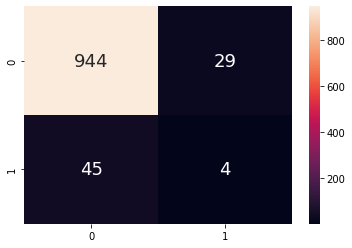

In [58]:
# 2c. model training, predicting (all variables incl unconventional)
scaler = MinMaxScaler()
X_train_scaled = xtrain.copy()
X_test_scaled = xtest.copy()

scaler.fit(X_train_scaled[['age', 'avg_glucose_level', 'bmi']])
X_train_scaled[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_train_scaled[['age', 'avg_glucose_level', 'bmi']])
X_test_scaled[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_test_scaled[['age', 'avg_glucose_level', 'bmi']])

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier()
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_scaled, ytrain.values.ravel())

knn = KNeighborsClassifier(n_neighbors=(grid_search.best_params_).get('n_neighbors'))
knn.fit(X_train_scaled, ytrain.values.ravel())
Y_test_pred = knn.predict(X_test_scaled)

print()
print("VARIATE: All features")
printGSCV((grid_search.best_params_).get('n_neighbors'), grid_search.best_score_)
modelStats(ytest, Y_test_pred)


Fitting 10 folds for each of 19 candidates, totalling 190 fits

VARIATE: Conventional Features
GSCV best N neighbour:  2
GSCV best score      :  0.9486861999715469
_______________________________________________________

Stats                 %
Accuracy            : 89.82387%
F1-Score            : 11.86441%
ROC_AUC score       : 53.95683%
TPR                 : 14.28571%
TNR                 : 93.62795%
FPR                 : 6.37205%
FNR                 : 85.71429%


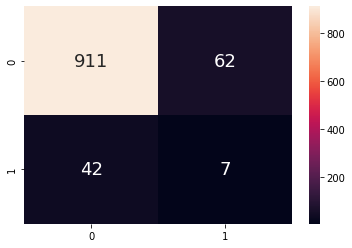

In [59]:
# 2d. model training, predicting (all excl unconventional)
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(xtrain[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'is_Male',
                                        'smoking_status_formerly smoked',	'smoking_status_never smoked', 'smoking_status_smokes','work_type_Govt_job']])
X_test_scaled = pd.DataFrame(xtest[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'is_Male',
                                        'smoking_status_formerly smoked',	'smoking_status_never smoked', 'smoking_status_smokes','work_type_Govt_job']])

scaler.fit(X_train_scaled[['age', 'avg_glucose_level', 'bmi']])
X_train_scaled[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_train_scaled[['age', 'avg_glucose_level', 'bmi']])
X_test_scaled[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_test_scaled[['age', 'avg_glucose_level', 'bmi']])

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier()
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_scaled, ytrain.values.ravel())

knn = KNeighborsClassifier(n_neighbors=(grid_search.best_params_).get('n_neighbors'))
knn.fit(X_train_scaled, ytrain.values.ravel())
Y_test_pred = knn.predict(X_test_scaled)

print()
print("VARIATE: Conventional Features")
printGSCV((grid_search.best_params_).get('n_neighbors'), grid_search.best_score_)
modelStats(ytest, Y_test_pred)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


VARIATE: Unconventional features
GSCV best N neighbour:  4
GSCV best score      :  0.7646084571534443
_______________________________________________________

Stats                 %
Accuracy            : 95.20548%
F1-Score            : 0.00000%
ROC_AUC score       : 50.00000%
TPR                 : 0.00000%
TNR                 : 100.00000%
FPR                 : 0.00000%
FNR                 : 100.00000%


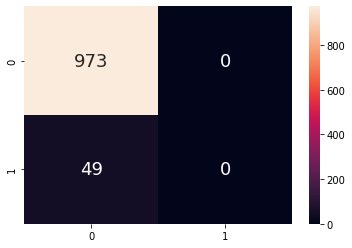

In [60]:
# 2e. model training, predicting (unconventional only)
X_train = pd.DataFrame(xtrain.drop(columns=['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'is_Male', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']))
X_test = pd.DataFrame(xtest.drop(columns=['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'is_Male', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']))

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier()
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, ytrain.values.ravel())

knn = KNeighborsClassifier(n_neighbors=(grid_search.best_params_).get('n_neighbors'))
knn.fit(X_train, ytrain.values.ravel())

Y_test_pred = knn.predict(X_test)

print()
print("VARIATE: Unconventional features")
printGSCV((grid_search.best_params_).get('n_neighbors'), grid_search.best_score_)
modelStats(ytest, Y_test_pred)

Fitting 10 folds for each of 19 candidates, totalling 190 fits

VARIATE: ever_married
GSCV best N neighbour:  1
GSCV best score      :  0.5052767052767052
_______________________________________________________

Stats                 %
Accuracy            : 95.20548%
F1-Score            : 0.00000%
ROC_AUC score       : 50.00000%
TPR                 : 0.00000%
TNR                 : 100.00000%
FPR                 : 0.00000%
FNR                 : 100.00000%


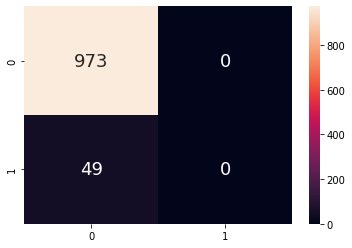

In [61]:
# 2f. model training, predicting (ever_married only)
X_train = pd.DataFrame(xtrain["ever_married"])
X_test = pd.DataFrame(xtest["ever_married"])

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier()
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, ytrain.values.ravel())

knn = KNeighborsClassifier(n_neighbors=(grid_search.best_params_).get('n_neighbors'))
knn.fit(X_train, ytrain.values.ravel())

Y_test_pred = knn.predict(X_test)

print()
print("VARIATE: ever_married")
printGSCV((grid_search.best_params_).get('n_neighbors'), grid_search.best_score_)
modelStats(ytest, Y_test_pred)

Fitting 10 folds for each of 19 candidates, totalling 190 fits

VARIATE: Work_Type
GSCV best N neighbour:  2
GSCV best score      :  0.7646084571534443
_______________________________________________________

Stats                 %
Accuracy            : 95.20548%
F1-Score            : 0.00000%
ROC_AUC score       : 50.00000%
TPR                 : 0.00000%
TNR                 : 100.00000%
FPR                 : 0.00000%
FNR                 : 100.00000%


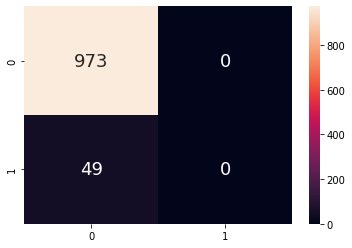

In [62]:
# 2g. model training, predicting (work_type only)
X_train = pd.DataFrame(xtrain[['work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']])
X_test = pd.DataFrame(xtest[['work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']])

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier()
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, ytrain.values.ravel())

knn = KNeighborsClassifier(n_neighbors=(grid_search.best_params_).get('n_neighbors'))
knn.fit(X_train, ytrain.values.ravel())

Y_test_pred = knn.predict(X_test)

print()
print("VARIATE: Work_Type")
printGSCV((grid_search.best_params_).get('n_neighbors'), grid_search.best_score_)
modelStats(ytest, Y_test_pred)

Fitting 10 folds for each of 19 candidates, totalling 190 fits

VARIATE: reside_urban
GSCV best N neighbour:  1
GSCV best score      :  0.4999999999999999
_______________________________________________________

Stats                 %
Accuracy            : 95.20548%
F1-Score            : 0.00000%
ROC_AUC score       : 50.00000%
TPR                 : 0.00000%
TNR                 : 100.00000%
FPR                 : 0.00000%
FNR                 : 100.00000%


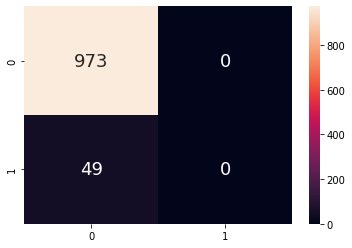

In [63]:
# 2h. model training, predicting (reside_urban only - Residence_Type)
X_train = pd.DataFrame(xtrain['reside_urban'])
X_test = pd.DataFrame(xtest['reside_urban'])

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier()
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, ytrain.values.ravel())

knn = KNeighborsClassifier(n_neighbors=(grid_search.best_params_).get('n_neighbors'))
knn.fit(X_train, ytrain.values.ravel())

Y_test_pred = knn.predict(X_test)

print()
print("VARIATE: reside_urban")
printGSCV((grid_search.best_params_).get('n_neighbors'), grid_search.best_score_)
modelStats(ytest, Y_test_pred)

### Observation

Although predicting stroke using the unconventional features individually gives us a high classification accuracy, there is **a case of underfit**. The training accuracy given by GSCV best score floats around the value of 0.49-0.50++, which indicates a **heavy biasness and low variance**. Due to the simplicity of the inputs, it is unable to yield ideal results. The same can be also observed when we combined all unconventional features.

When all features are used in training, KNN yields a relatively lower classification accuracy with **high FNR and low FPR**. While the classification accuracy of more than 90% is considered high, **accuracy alone does not help us in solving our problem**. In addition, high FNR poses a huge issue in the medical field as it can lead to misclassification of (potential) stroke patients as people who do not have stroke.

### Conclusion
KNN is **NOT an ideal classifier** to use in this case.
<br><br>
There is **likely some correlation** between stroke and unconventional features because the **classification accuracy and F1-score are higher when unconventional features are included** (as compared to when only conventional features are used).

### Other Notes
We have to take note that low values for k (like 1 and 2) can cause **more noise** and classification can be **severely impacted by outliers**.
<br><br>
Large k values will cause **minorities to always be outvoted by other categories**, causing a **bias** in the model.

## Model: XGBoost

### **How XGBoost works?**

XGBoost is a supervised learning algorithm. It is a decision-tree-based ensemble machine learning algorithm involving gradient boosting.
<br><br>
Gradient boosting is an approach where new models, typically a tree, are created to predict the residuals or errors of prior models. These models are then added together to make the final prediction. The trees are built sequentially so that each subsequent tree reduces the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new trees. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

In [64]:
# 3a. libraries for xgboost
import xgboost as xg
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV

In [65]:
# 3b. model training, predicting (without cross validation)
xgboost = xg.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgboost.fit(xtrain , ytrain.values.ravel())

ypred_xgb = xgboost.predict(xtest)

Stats                 %
Accuracy            : 90.80235%
F1-Score            : 21.66667%
ROC_AUC score       : 60.28483%
TPR                 : 26.53061%
TNR                 : 94.03905%
FPR                 : 5.96095%
FNR                 : 73.46939%


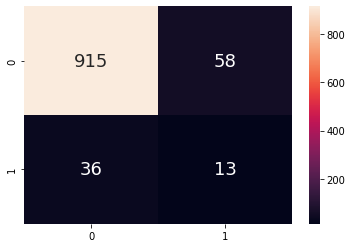

In [66]:
# 3c. model stats (without cross validation)
modelStats(ytest, ypred_xgb)

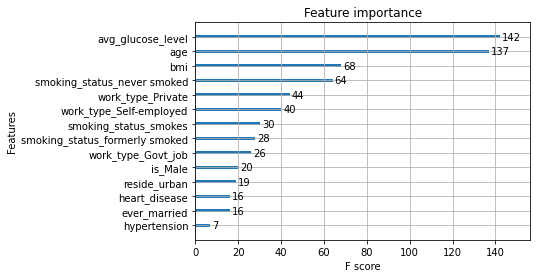

In [67]:
# 3d. feature importance (without cross validation)
plot_importance(xgboost)
plt.show()

In [68]:
# 3e. model training, predicting (with cross validation)
xgboost_cv = xg.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

learn_range = [0.1, 0.2, 0.3] #list([flt / 100.0 for flt in range(1, 11)])
n_estimators_range = list([flt * 100 for flt in range(8, 11)])
param_grid = dict(learning_rate=learn_range, n_estimators=n_estimators_range)

grid = GridSearchCV(xgboost_cv, param_grid, cv=2, scoring='accuracy', return_train_score=False,verbose=1)
# fitting the model for grid search
grid_search=grid.fit(xtrain, ytrain.values.ravel())

xgboost_cv = xg.XGBClassifier(n_estimators=(grid_search.best_params_).get('n_estimators'), learning_rate=(grid_search.best_params_).get('learning_rate'), use_label_encoder=False, eval_metric="logloss")
xgboost_cv.fit(xtrain , ytrain.values.ravel())

ypred_xgb_cv = xgboost_cv.predict(xtest)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GSCV best n_estimators:  900
GSCV best learning_rate:  0.3
GSCV best score:  0.9533058914329817
__________________________________________________
Stats                 %
Accuracy            : 91.48728%
F1-Score            : 12.12121%
ROC_AUC score       : 53.86140%
TPR                 : 12.24490%
TNR                 : 95.47790%
FPR                 : 4.52210%
FNR                 : 87.75510%


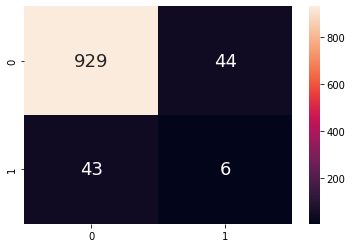

In [69]:
# 3f. model stats (WITH cross validation)
print("GSCV best n_estimators: ", (grid_search.best_params_).get('n_estimators'))
print("GSCV best learning_rate: ", (grid_search.best_params_).get('learning_rate'))
print("GSCV best score: ", grid_search.best_score_)
print("__________________________________________________")

modelStats(ytest, ypred_xgb_cv)

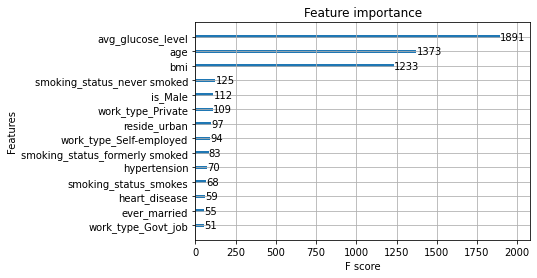

In [70]:
# 3g. feature importance (WITH cross validation)
plot_importance(xgboost_cv)
plt.show()

### Observations

From the above, we can observe that XGBoost is a good ML algorithm in predicting stroke as it yield a 90%+ accuracy rate. However, with a F1-Score of 0.234, we can see that it have a weak performance in the False Postive and False Negative values which are critical in the medical field. 

From the feature importance function that is provided in the XGBoost library, we observe that the top 3 important features are 'bmi', 'age' and 'avg_glucose_level', and this is within our expectations. Looking at the unconventional features, we observe that 'work_type' is the leading feature, followed by 'reside_urban' (formerly 'Residence_type') and 'ever_married'. These findings tally with some of our previous findings.

## Model: Artificial Neural Network

### **How does Artificial Neural Network works?**

Artificial Neural Networks (ANNs) are weighted directed graphs that try to mimic the way the human brain is constructed. Neurons in the brain can be compared to the nodes in ANN and the connection between two neurons can be compared to the weighted edges in ANN.
<br><br>
<img src="ann.jpg">

Training of the ANN model goes through many epochs, and in each epoch, the weights of the connections are modified in an attempt to make the classification more accurate. 


In [71]:
# 4a. libraries for ann
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [72]:
# 4b. model training, predicting
ann = Sequential()
ann.add(Dense(units=128, activation="relu"))
ann.add(Dense(units=64, activation="relu"))
ann.add(Dense(units=1, activation="sigmoid"))
ann.compile('adam', 'binary_crossentropy', metrics=['binary_accuracy'])

path = "model_new.h5"
model_checkpoint = ModelCheckpoint(
  filepath=path,
  save_weights_only=False,
  monitor="loss",
  mode="min",
  save_best_only=True
)

result = ann.fit(xtrain, ytrain, epochs=100, verbose=2, callbacks=[model_checkpoint]) # training

ypred=[]
ann = load_model("model_new.h5") # best model from new training

def predictLabel(ann, ypred, xtest):
  for i in ann.predict(xtest):
    if i>0.5:
      ypred.append(1)
    else:
      ypred.append(0)

predictLabel(ann, ypred, xtest) # predicting

Epoch 1/100
243/243 - 1s - loss: 0.5109 - binary_accuracy: 0.7656 - 1s/epoch - 5ms/step
Epoch 2/100
243/243 - 0s - loss: 0.3522 - binary_accuracy: 0.8453 - 417ms/epoch - 2ms/step
Epoch 3/100
243/243 - 0s - loss: 0.2801 - binary_accuracy: 0.8824 - 405ms/epoch - 2ms/step
Epoch 4/100
243/243 - 0s - loss: 0.2636 - binary_accuracy: 0.8862 - 401ms/epoch - 2ms/step
Epoch 5/100
243/243 - 0s - loss: 0.2370 - binary_accuracy: 0.9001 - 421ms/epoch - 2ms/step
Epoch 6/100
243/243 - 0s - loss: 0.2268 - binary_accuracy: 0.9029 - 405ms/epoch - 2ms/step
Epoch 7/100
243/243 - 0s - loss: 0.2236 - binary_accuracy: 0.9093 - 413ms/epoch - 2ms/step
Epoch 8/100
243/243 - 0s - loss: 0.2459 - binary_accuracy: 0.9001 - 412ms/epoch - 2ms/step
Epoch 9/100
243/243 - 0s - loss: 0.2364 - binary_accuracy: 0.8995 - 392ms/epoch - 2ms/step
Epoch 10/100
243/243 - 0s - loss: 0.2343 - binary_accuracy: 0.9073 - 391ms/epoch - 2ms/step
Epoch 11/100
243/243 - 0s - loss: 0.2071 - binary_accuracy: 0.9143 - 403ms/epoch - 2ms/step


Stats                 %
Accuracy            : 93.05284%
F1-Score            : 14.45783%
ROC_AUC score       : 54.68360%
TPR                 : 12.24490%
TNR                 : 97.12230%
FPR                 : 2.87770%
FNR                 : 87.75510%


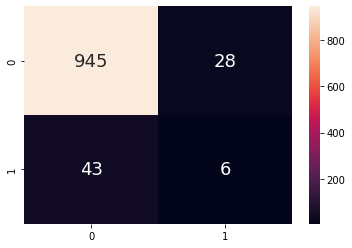

In [73]:
# 4c. statistics for new best
modelStats(ytest,ypred)

In [74]:
# 4d. model testing, replacement
pretrained = load_model("model.h5")
oldmodel = {
  'tn':0,
  'fp':0,
  'fn':0,
  'tp':0
}
newmodel = {
  'tn':0,
  'fp':0,
  'fn':0,
  'tp':0
}

for i in range(5): # average of 5 random selection
  _,xtest_t,_,ytest_t = trainTestSmote(cleanData, False)
  oldmodel_pred = []
  predictLabel(pretrained, oldmodel_pred, xtest_t)
  old_cm = confusion_matrix(ytest_t, oldmodel_pred)
  tn, fp, fn, tp = tfnp(old_cm)
  oldmodel['tn']+=tn
  oldmodel['fp']+=fp
  oldmodel['fn']+=fn
  oldmodel['tp']+=tp
  newmodel_pred = []
  predictLabel(ann, newmodel_pred, xtest_t)
  new_cm = confusion_matrix(ytest_t, newmodel_pred)
  tn, fp, fn, tp = tfnp(new_cm)
  newmodel['tn']+=tn
  newmodel['fp']+=fp
  newmodel['fn']+=fn
  newmodel['tp']+=tp

print("OLD MODEL\n==========")
print("{:<10}: {:.5f}%".format("Avg FPR", oldmodel['fp']/(oldmodel['fp']+oldmodel['tn'])*100))
print("{:<10}: {:.5f}%".format("Avg FNR", oldmodel['fn']/(oldmodel['fn']+oldmodel['tp'])*100))
print("\nNEW MODEL\n==========")
print("{:<10}: {:.5f}%".format("Avg FPR", newmodel['fp']/(newmodel['fp']+newmodel['tn'])*100))
print("{:<10}: {:.5f}%".format("Avg FNR", newmodel['fn']/(newmodel['fn']+newmodel['tp'])*100))  

check = input("Do you want to replace old model with new model? [Yes (Y) / No (N)]")
if (check=="Yes" or check=="Y"):
  from os import makedirs
  from os.path import isdir
  from shutil import move
  from time import time_ns
  if not isdir('archive'):
    makedirs('archive')
  move("model.h5", "./archive/model_"+str(time_ns())+".h5") # save old model as archive
  move("model_new.h5", "model.h5")

OLD MODEL
Avg FPR   : 8.53333%
Avg FNR   : 43.82979%

NEW MODEL
Avg FPR   : 1.90769%
Avg FNR   : 74.04255%
Do you want to replace old model with new model? [Yes (Y) / No (N)]N


### Connection weights algorithm
The Connection Weights algorithm (CW) can be used to determine the feature importance in a neural network. 
<br><br>
It calculates the dot product of two sets of weights: (i) weights of connections between input layer and the hidden layer; and (ii) weights of connections between the hidden layer and output layer.
<br><br>
See screenshot from https://csiu.github.io/blog/update/2017/03/31/day35.html below.
<br><br>
<img src="cw.jpg">

The CW algorithm is mainly used for neural networks with a single hidden layer, but in the case of this project, we are **adapting this algorithm for multiple hidden layers**.

We will calculate the dot product of weights of connections between all layers and present the number as a proportion out of 100 to help us determine which features are more important.

In [75]:
# 4e. feature importance
def connection_weights(A,B):
  cw_raw = np.dot(A,B)
  return cw_raw

ann = load_model("model.h5")

cw = ann.get_layer(ann.layers[0].name).get_weights()[0] # first layer weights
i=1

try:
  while True:
    cw = connection_weights(cw, ann.get_layer(ann.layers[i].name).get_weights()[0])
    i += 1
except IndexError:
  cw = cw / cw.sum() * 100 # change it to proportions out of 100

print("{:<30} Importance (as proportion out of 100)".format("Features"))
print("====================================================================")
for i in range(len(cw)):
    print("{:<30}: {}".format(xtrain.columns[i], cw[i][0]))

Features                       Importance (as proportion out of 100)
is_Male                       : 5.845587730407715
age                           : -0.14744774997234344
hypertension                  : -0.5824101567268372
heart_disease                 : 0.8544265031814575
ever_married                  : 3.9699978828430176
reside_urban                  : 3.380530595779419
avg_glucose_level             : -0.07268122583627701
bmi                           : -0.5898993015289307
work_type_Govt_job            : 12.689520835876465
work_type_Never_worked        : 9.327534675598145
work_type_Private             : 11.539326667785645
work_type_Self-employed       : 14.900933265686035
work_type_children            : 2.35603666305542
smoking_status_formerly smoked: 8.440438270568848
smoking_status_never smoked   : 15.71632194519043
smoking_status_smokes         : 12.371788024902344


Note:
<br><br>
Non-conventional factors (descending order, rounded off to 2 d.p.)
* **work_type_Self-employed : 14.90**
* **work_type_Govt_job : 12.69**
* **work_type_Private : 11.54**
* **work_type_Never_worked : 9.33**
* ever_married : 3.97
* reside_urban : 3.38
* work_type_children : 2.36

Note:
<br><br>
Some of the **non-conventional factors have higher importance than some conventional factors** like heart_disease.
<br><br>
In addition, some factors like **bmi and hypertension** have negative importance.

Note: The conclusion from ANN is that **work_type is an unconventional factor** that affects a person's likelihood of getting a stroke. 

### Observations

ANN can create models that are **very different for every train**. Some models can have a **much greater negative bias** than other models, i.e., some models produce much higher FNR.

In addition, from the Connection Weights algorithm, 'bmi' and 'hypertension' have **negative importance** in the model. It is rather surprising to see that, especially for 'hypertension', since it is usually linked to 'stroke' medically.

### Conclusion
'work_type' is the unconventional feature that affects a person's likelihood of getting a stroke. 'ever_married' and 'Residence_type' do not have a great impact on the likelihood.

## Model: Naive Bayes

### How does Naive Bayes work?

Naive Bayes is a supervised learning process use for making classification predictions based on past data we possessed.
<br><br>
The main assumption related to this learning is the independence between each input variable. Although, realistically, variables are often correlated with one another, this assumption gives rise to Naive Bayes' ability to look at variables individually.
<br><br>
Naive Bayes works by finding the conditional and unconditional probabilities related to the features given and predict the class with higher probability.

In [76]:
# 5a. libraries for naive bayes
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

In [77]:
# 5b. setting up
sc = StandardScaler()
classifier = GaussianNB()

Stats                 %
Accuracy            : 95.69472%
F1-Score            : 35.29412%
ROC_AUC score       : 94.02302%
TPR                 : 92.30769%
TNR                 : 95.73835%
FPR                 : 4.26165%
FNR                 : 7.69231%


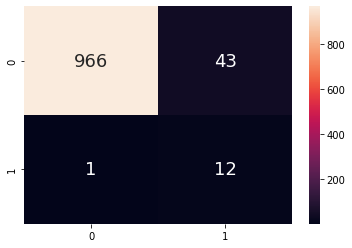

In [78]:
# 5c. model training, predicting (conventional data) + stats
conventional_data = pd.DataFrame(cleanData[["is_Male", "age","hypertension","heart_disease","avg_glucose_level","bmi","smoking_status_formerly smoked","smoking_status_never smoked","smoking_status_smokes"]])

y = pd.DataFrame(cleanData['stroke']) 
X = conventional_data

X, y = make_classification(n_samples=5109, weights=[0.99], flip_y=0, random_state=1)

X_train, X_test, y_train, y_test = trainTestSmoteSep(X,y,verbose=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

modelStats(y_test,y_pred)

Stats                 %
Accuracy            : 94.91194%
F1-Score            : 35.00000%
ROC_AUC score       : 91.26491%
TPR                 : 87.50000%
TNR                 : 95.02982%
FPR                 : 4.97018%
FNR                 : 12.50000%


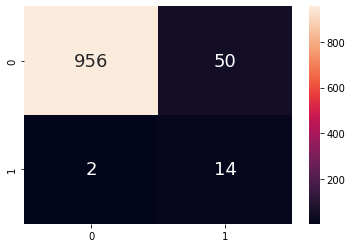

In [79]:
# 5d. model training, predicting (unconventional data) + stats
marriage_data = pd.DataFrame(cleanData[["ever_married","reside_urban","work_type_Govt_job", "work_type_Private", "work_type_children", "work_type_Self-employed", "work_type_Never_worked"]])

y = pd.DataFrame(cleanData['stroke']) 
X = marriage_data

X, y = make_classification(n_samples=5109, weights=[0.99], flip_y=0, random_state=1)

X_train, X_test, y_train, y_test = trainTestSmoteSep(X,y,verbose=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

modelStats(y_test,y_pred)

Stats                 %
Accuracy            : 95.59687%
F1-Score            : 23.72881%
ROC_AUC score       : 91.58037%
TPR                 : 87.50000%
TNR                 : 95.66075%
FPR                 : 4.33925%
FNR                 : 12.50000%


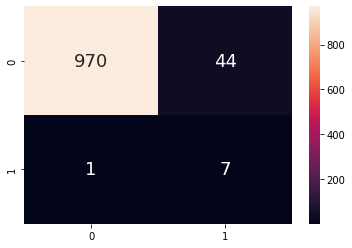

In [80]:
# 5e. model training, predicting (conventional data + ever_married) + stats
marriage_data = pd.DataFrame(cleanData[["ever_married","is_Male", "age","hypertension","heart_disease","avg_glucose_level", "bmi",
                                        "smoking_status_formerly smoked","smoking_status_never smoked","smoking_status_smokes"]])

y = pd.DataFrame(cleanData['stroke']) 
X = marriage_data

X, y = make_classification(n_samples=5109, weights=[0.99], flip_y=0, random_state=1)

X_train, X_test, y_train, y_test = trainTestSmoteSep(X,y,verbose=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

modelStats(y_test,y_pred)

Stats                 %
Accuracy            : 96.67319%
F1-Score            : 22.72727%
ROC_AUC score       : 90.04265%
TPR                 : 83.33333%
TNR                 : 96.75197%
FPR                 : 3.24803%
FNR                 : 16.66667%


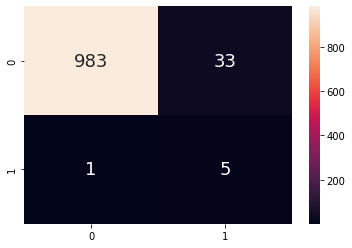

In [81]:
# 5f. model training, predicting (conventional data + reside_urban) + stats
residence_data = pd.DataFrame(cleanData[["reside_urban","is_Male","age","hypertension","heart_disease","avg_glucose_level","bmi","smoking_status_formerly smoked","smoking_status_never smoked","smoking_status_smokes"]])

y = pd.DataFrame(cleanData['stroke']) 
X = residence_data 

X, y = make_classification(n_samples=5109, weights=[0.99], flip_y=0, random_state=1)

X_train, X_test, y_train, y_test = trainTestSmoteSep(X,y,verbose=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

modelStats(y_test,y_pred)

Stats                 %
Accuracy            : 97.16243%
F1-Score            : 25.64103%
ROC_AUC score       : 84.38424%
TPR                 : 71.42857%
TNR                 : 97.33990%
FPR                 : 2.66010%
FNR                 : 28.57143%


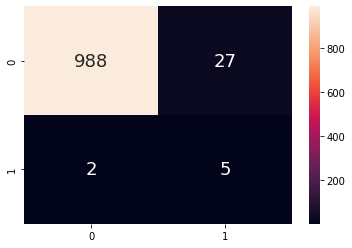

In [82]:
# 5f. model training, predicting (conventional data + work_type) + stats
job_data = pd.DataFrame(cleanData[["work_type_Govt_job","work_type_Private","work_type_children","work_type_Self-employed","work_type_Never_worked",
                                    "is_Male", "age","hypertension","heart_disease","avg_glucose_level","bmi",
                                    "smoking_status_formerly smoked","smoking_status_never smoked","smoking_status_smokes"]])

y = pd.DataFrame(cleanData['stroke']) 
X = job_data

X, y = make_classification(n_samples=5109, weights=[0.99], flip_y=0, random_state=1)

X_train, X_test, y_train, y_test = trainTestSmoteSep(X,y,verbose=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

modelStats(y_test,y_pred)

### **Permutation Feature Importance**

The permutation feature importance is the drop in a model score when one feature value is randomly shuffled. As such, the relationship between this feature and stroke is broken, thus the larger the fall in the model score the more the Naive Bayes is dependent on this feature.

Negative values can sometime be obtained. However, these values are ignored as it means a better score is obtained after the shuffling. This also means that these feature with negative values for permutation feature importance impact the prediction negatively.

In [83]:
# 5g. permutation feature importance
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import CategoricalNB

features = cleanData.columns.tolist()

cnb = CategoricalNB()
cnb.fit(xtrain, ytrain)
y_pred_cnb = cnb.predict(xtest)

imps = permutation_importance(cnb, xtest, ytest)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(xtest.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. smoking_status_smokes (0.013894)
2. work_type_Govt_job (0.012720)
3. work_type_Self-employed (0.011155)
4. work_type_Private (0.010568)
5. smoking_status_never smoked (0.007045)
6. reside_urban (0.005871)
7. smoking_status_formerly smoked (0.004110)
8. is_Male (0.002935)
9. hypertension (0.000587)
10. work_type_Never_worked (-0.001370)
11. heart_disease (-0.001566)
12. avg_glucose_level (-0.004305)
13. ever_married (-0.008219)
14. bmi (-0.013699)
15. work_type_children (-0.016243)
16. age (-0.019569)


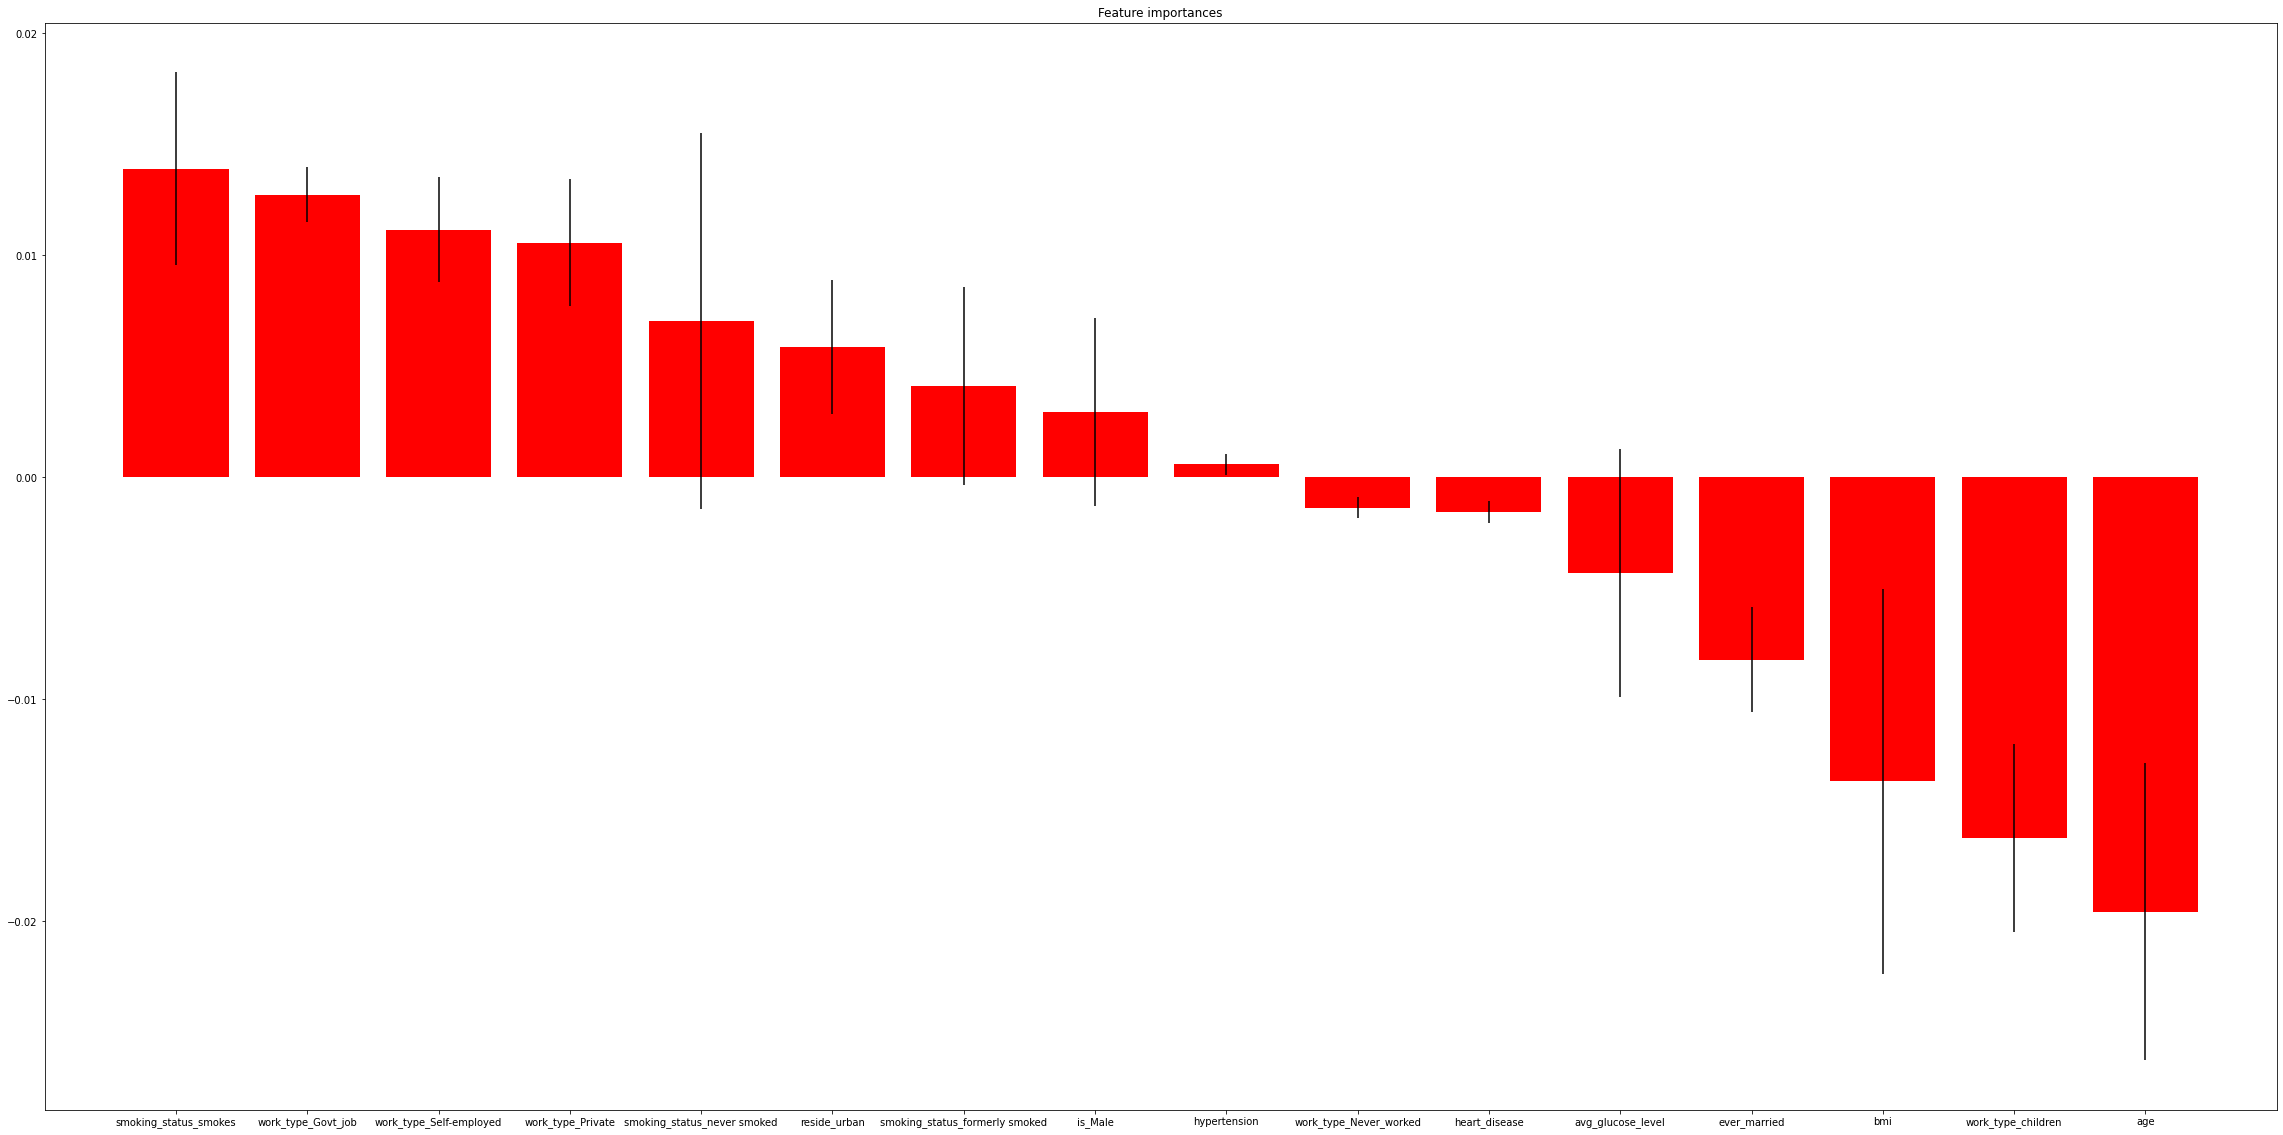

In [84]:
plt.figure(figsize=(40, 20))
plt.title("Feature importances")
plt.bar(range(xtest.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(xtest.shape[1]), [features[indices[i]] for i in range(len(indices))])
plt.xlim([-1, xtest.shape[1]])
plt.show()

### Observations

Based on Naive Bayes, the following observations can be made:

1. Conventional features generally influence the possibility of attaining stroke slightly more than the unconventional features. This can be seen from the **higher accuracy in prediction when conventional features are used** as compared to unconventional.

2. Order of unconventional features from most important to least important: **work_type > ever_married > reside_urban** 

    This is evident from the accuracy obtained. The difference when the 5 different options of 'work_type' are added to the conventional data is much larger as compared to when either 'ever_married' or 'reside_urban' is added. This difference shows how the feature added affects the accuracy of the conventional data. As such, the **larger the difference in accuracy** between the result obtained when one unconventional factor is added and the accuracy with only conventional data, the **larger the influence this unconventional feature has on the prediction of stroke**.

3. From the result obtained from the Permutation Feature Importance, Naive Bayes generally shows a **higher dependency on 'work_type'** as compared to 'reside_urban' and 'ever_married'. This is seen from the plot with 'work_type_Govt_job' showing the largest feature importance, followed by 'work_type_Never_worked' and 'work_type_Self_employed'.

    **'reside_urban' and 'ever_married' are ignored as they give a negative value** for Permutation Feature Importance, which means the prediction is negatively affected by these features.


### Conclusion
With the high accuracy and low FNR, it can be seen that Naive Bayes is a reliable machine learning method in classifying whether a person has stroke based on the various features given.

### Other Notes
Despite the fact that input features have the potential to be dependent on one another, it can be seen that the accuracy of prediction is not compromised even with the assumption f independency.

Naive Bayes is good at achieving low FPR and FNR, which is important in the medical perspective as we do not want to wrongly classify the (potential) stroke status of people.

# Note:
* **Top 3 unconventional features** (in descending order):
>1) 'work_type_Private'<br>
>2) 'reside_urban'<br>
>3) 'work_type_Self-employed'
* Any interesting
>1) 'ever_married' is the **3rd least important**. Contradicts EDA insights.<br><br>
>2) 'work_type_children' and 'work_type_Never_worked' are **not important at all**.


Summary of Insights
* Ranking unconventional features (generally across all models)
> 1. 'work_type'
> 2. 'ever_married'
> 3. 'reside_urban'
* Interesting notes
> 1. 

---
# **Conclusion:**
In this section:<br>
1. Pros and cons of models
2. Ideal model
3. Answering our question

## Pros and Cons of Our Models

### **k-Nearest Neighbors**
Not a useful classifier to solve our question but it hints that unconventional features hold some weight in the prediction of stroke.

**Pros of k-Nearest Neighbors**
1.   Can be used both for Classification and Regression
2.   No training period - KNN is called Lazy Learner, it stores the training dataset and learns from it only at the time of making real time predictions
3.   Very easy to implement for multi-class problem

**Cons of k-Nearest Neighbors**
1.   Sensitive to noisy data, missing values and outliers
2.   Does not work well with imbalanced data
3.   Does not work well with large dataset
4.   Does not work well with high dimensions





### **XGBoost**
XGBoost gives high accuracy score but low F1-score, rendering it an unideal model for stroke prediction.

**Pros of XGBoost**
1.   Less feature engineering required (no need for scaling, normalizing data, can handle missing values well)
2.   Outliers have minimal impact
3.   Handles large dataset well

**Cons of XGBoost**
1.   Harder to tune as there are too many hyperparameters
2.   Prone to overfitting if parameters are not tuned properly




### **Artificial Neural Network**
Model can be improved through fine-tuning but it takes a long time to find the ideal model.

**Pros of ANN**
1. Can be used as long as the variables are numerical, or can be converted into numbers
2. Scalable for large datasets
3. Accepts any number of inputs

**Cons of ANN**
1. Dependency on training data, tuned to data
2. No given 'feature importance' function, can only be deduced through other methods like Connection Weights algorithm

### **Naive Bayes**
Naive Bayes (NB) generally produces the lowest FPR and FNR across all models/algorithms tested.

**Pros of NB**
1. High accuracy even if dependencies work closely with one another
2. Works well with small datasets too
3. More efficient than models like KNN

**Cons of NB**
1. Assumption of independency can be unrealistic

## Ideal Model

We think that **Naive Bayes** is the ideal model to use in this case due to the following reasons:

1. **Lower FPR and FNR as compared to other models**<br>
    It is the only model we tried that was able to obtain such low FPR and FNR, which the other models almost fail terribly at.<br><br>
2. **Ability to look at features individually**<br>
    This is helpful since we zoom in on the unconventional features for our project. This ability of Naive Bayes helps us to gain more insights about our unconventional features.<br><br>
3. **Accuracy is generally higher than other models**

## Answering Our Question


Q: Do **unconventional features** help to better predict whether a person will have / already has a stroke?
<br><br>
A: **YES**

### Unconventional feature: 'work_type'
* Significant: Exploratory Data Analysis, XGBoost, Artificial Neural Network, Naive Bayes
* Neutral: SelectKBest
* Insignificant: 

### Unconventional feature: 'ever_married'
* Significant: Exploratory Data Analysis, SelectKBest
* Neutral: XGBoost
* Insignificant: Artificial Neural Network, Naive Bayes

### Unconventional feature: 'Residence_type' (or 'reside_urban' in cleaned data)
* Significant: XGBoost
* Neutral:
* Insignificant: Exploratory Data Analysis, SelectKBest, Artificial Neural Network, Naive Bayes

General insights:
It is interesting to see that some insights gained from Exploratory Data Analysis (EDA) are echoed by our models, while other insights are contradicted by our models. 

'work_type' is an unconventional feature which seems very likely to impact a person's likelihood of getting or having a stroke. This is backed up by our EDA as well as most of our models tried. We noticed from EDA that people who have a job, regardless of whether it is a position in government or private sectors, or self-employment, are more likely to have had a stroke. This could be linked to work-related stress. 

### Final Insight

During our EDA, we have noted that **type_work** and **ever_married** are the potential unconventional factors contributing to stroke while type_residence does not have much potential. Additionally we also did a categorical correlation test using CHI-Square test which also indicates the **same findings as EDA**.

Our insights at the beginning of our project is indeed **consistent** with some of our findings through our exploration in Machine Learning and Artifical Intelligence. Noting that **type_work** is the **most significant** contributing factor among the 3 unconventional factors. 

It is quite surprising to see that how living in a rural environment vs urban environment does not seem to have any significant contribution to having a stroke. Logically speaking, environmental factors contribute largely to a person's health especially those who live in the urban area are usually more exposed to higher density of pollution compared to those in rural.




---
# **References:**
* American Heart Association (2021). *2021 Heart Disease & Stroke Statistical Update Fact Sheet Global Burden of Disease*. Professional Heart Daily. https://professional.heart.org/-/media/PHD-Files-2/Science-News/2/2021-Heart-and-Stroke-Stat-Update/2021_Stat_Update_factsheet_Global_Burden_of_Disease.pdf
* Bariatric Department at Lafayette General Medical Center (2019). *How Obesity Affects Stroke Risk*. Ochsner Lafayette General. https://ochsnerlg.org/about-us/news/how-obesity-affects-stroke-risk
* WebMD (2021). *Top 10 Causes of Strokes - Risk Factors and How You Can Lower Your Risks*. WebMD. https://www.webmd.com/stroke/guide/stroke-causes-risks
* World Stroke Organization (n.d.). *Learn about stroke*. World Stroke Orgnization. https://www.world-stroke.org/world-stroke-day-campaign/why-stroke-matters/learn-about-stroke
* Wyller T. B. (1999). Stroke and gender. *The journal of gender-specific medicine : JGSM : the official journal of the Partnership for Women's Health at Columbia*, 2(3), 41–45.
